# Problem Statement 

- The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it to their advantage by becoming a defaulter. 
- When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:
- If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
- If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.


- This case study aims to identify patterns which indicate if a client has difficulty paying their instalments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study

# Importing libraries

In [2]:
import pandas as pd
import numpy as nd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings(action="ignore")
pd.set_option('display.max_columns', 300)
pd.set_option('display.max_rows', 300)
pd.set_option('display.width', 1000)
sns.set_style("whitegrid")

# Data loading and understanding

In [3]:
#application_data file is storing in app_data
app_data=pd.read_csv("application_data.csv")

In [4]:
#checking data storage is done or not by using head()
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  \
0      100002       1         Cash loans           M            N               Y             0          202500.0    406597.5      24700.5         351000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.018801       -9461           -637            -3648.0            -2120          NaN           1               1                0                 1           1           0        Laborers              1.0                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3      0.083037      0.262949      0.139376          0.0247            0.0369                       0.9722           0.6192          0.0143           0.00         0.0690         0.0833         0.1250        0.0369   
1      100003       0         Cash loans           F            N               N             0          270000.0   1293502.5      35698.5        1129500.0          Family    State servant               Higher education               Married  House / apartment                    0.003541      -16765          -1188            -1186.0             -291          NaN           1               1                0                 1           1           0      Core staff              2.0                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School      0.311267      0.622246           NaN          0.0959            0.0529                       0.9851           0.7960          0.0605           0.08         0.0345         0.2917         0.3333        0.0130   
2      100004       0    Revolving loans           M            Y               Y             0           67500.0    135000.0       6750.0         135000.0   Unaccompanied          Working  Secondary / secondary special  Single / not married  House / apartment                    0.010032      -19046           -225            -4260.0            -2531         26.0           1               1                1                 1           1           0        Laborers              1.0                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government           NaN      0.555912      0.729567             NaN               NaN                          NaN              NaN             NaN            NaN            NaN            NaN            NaN           NaN   
3      100006       0         Cash loans           F           

In [5]:
#describe
app_data.describe

<bound method NDFrame.describe of         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  FLOORSMAX_AVG  FL

In [6]:
#info() gives null and non null values and datatypes of the columns
app_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

# Data Analysis

In [7]:
# Percentage of missing values in application.csv
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.003902
AMT_GOODS_PRICE                  0.090403
NAME_TYPE_SUITE                  0.420148
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     65.990810
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

In [8]:
# Dropping the columns if the null percentage is more than 40 
app_data1 = app_data.loc[:,app_data.isnull().mean()<=0.4]

- Removing the columns which are having more than 40% null values gives better visualization and accuracy
- If we not remove these columns they create discrepencies in analysis
- If the null values are less than 30% we can replace them by using mean or median instead of removing so that we can reduce data loss

In [9]:
app_data1.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

- we can remove some columns which are not useful for the analysis so that we can have clean data
- If we keep these useless columns also it will not effect the analysis
- I am not removing these columns and performing the analysis

In [10]:
# columns with no null values
s=app_data1.isnull().mean()<=0.01
s.value_counts()

True     65
False     8
dtype: int64

- In total 73 columns, 65 columns are having non-null values and 8 having null values
- we can replace  null values  with mean or median or drop them if they are very less compared to non null values 

- I am taking few columns and seperated them as categorical columns and continous columns and performing analysis


# categorical_columns
# NAME_CONTRACT_TYPE

In [11]:
# checking null values
app_data1.NAME_CONTRACT_TYPE.isnull().sum()

0

In [12]:
#checking count in each category
app_data1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [13]:
#checking count in each category by percentage
app_data1.NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100)

Cash loans         90.478715
Revolving loans     9.521285
Name: NAME_CONTRACT_TYPE, dtype: float64

In [14]:
# checking datatype
app_data1.NAME_CONTRACT_TYPE.dtype

dtype('O')

# CODE_GENDER


In [15]:
# checking null values
app_data1.CODE_GENDER.isnull().sum()

0

In [16]:
#checking count in each category
app_data1.CODE_GENDER.value_counts()

F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64

- Here there is XNA so we have to replace it with the mean i.e F because it is irrelevant

In [17]:
#checking count in each category by percentage
app_data1.CODE_GENDER.value_counts(normalize=True).mul(100)

F      65.834393
M      34.164306
XNA     0.001301
Name: CODE_GENDER, dtype: float64

In [18]:
#checking rows for which CODE_GENDER is XNA
df_new = app_data1[app_data1['CODE_GENDER'] == 'XNA']
df_new

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE NAME_FAMILY_STATUS    NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL     OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
35657       141289       0    Revolving loans         XNA            Y               Y             0          207000.0    382500.0      19125.0         337500.0   Unaccompanied               Working  Secondary / secondary special            Married  Municipal apartment                    0.020713      -20232         -10044           -10024.0            -3537           1               1                1                 1           1           0                 NaN              2.0                     3                            3                    TUESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 1      0.295998      0.461482                       0.0                       0.0                       0.0                       0.0                  -286.0                0                0                0                0   
38566       144669       0    Revolving loans         XNA            N               Y             2          157500.0    270000.0      13500.0         225000.0          Family               Working  Secondary / secondary special            Married    House / apartment                    0.026392      -13717          -2797            -2241.0            -4659           1               1                1                 1           1           0  Low-skill Laborers              4.0                     2                            2                     FRIDAY                       16                           0                           0                            0                       0                       0                        0        Industry: type 3      0.709205      0.310818                       0.0                       0.0                       0.0                       0.0                  -493.0                0                0                0                0   
83382       196708       0    Revolving loans         XNA            N               Y             1          135000.0    405000.0      20250.0         225000.0   Unaccompanied               Working               Higher education            Married    House / apartment                    0.035792      -10647          -1228             -183.0            -1671           1               1                1                 1           1           0          Core staff              3.0                     2                            2                   THURSDAY                       15                           0                           0                            0                       0                       0                        0            Kindergarten      0.659185      0.076984                       7.0                       1.0                       7.0                       1.0                  -851.0                0                0                0                0   
189640      319880  

In [19]:
#Replacing XNA with F as F is more than M
app_data1['CODE_GENDER'].mask(app_data1['CODE_GENDER'] == 'XNA', "F", inplace=True)

In [20]:
##checking count in each category
app_data1.CODE_GENDER.value_counts()

F    202452
M    105059
Name: CODE_GENDER, dtype: int64

- succesfully removed the XNA values

In [21]:
#checking count in each category by percentage
app_data1.CODE_GENDER.value_counts(normalize=True).mul(100)

F    65.835694
M    34.164306
Name: CODE_GENDER, dtype: float64

In [22]:
# checking datatype
app_data1.CODE_GENDER.dtype

dtype('O')


# FLAG_OWN_CAR

In [23]:
# checking null values
app_data1.FLAG_OWN_CAR.isnull().sum()

0

In [24]:
#checking count in each category
app_data1.FLAG_OWN_CAR.value_counts()

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [25]:
#checking count in each category by percentage
app_data1.FLAG_OWN_CAR.value_counts(normalize=True).mul(100)

N    65.989184
Y    34.010816
Name: FLAG_OWN_CAR, dtype: float64

In [26]:
# checking datatype
app_data1.FLAG_OWN_CAR.dtype

dtype('O')

# FLAG_OWN_REALTY

In [27]:
# checking null values
app_data1.FLAG_OWN_REALTY.isnull().sum()

0

In [28]:
#checking count in each category
app_data1.FLAG_OWN_REALTY.value_counts()

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [29]:
#checking count in each category by percentage
app_data1.FLAG_OWN_REALTY.value_counts(normalize=True).mul(100)

Y    69.367275
N    30.632725
Name: FLAG_OWN_REALTY, dtype: float64

In [30]:
# checking datatype
app_data1.FLAG_OWN_REALTY.dtype

dtype('O')

# OCCUPATION_TYPE

In [31]:
# checking null values
app_data1.OCCUPATION_TYPE.isnull().sum()

96391

In [32]:
# checking null values by percentage
app_data1.OCCUPATION_TYPE.isnull().sum()/app_data1.shape[0]*(100)

31.345545362604916

- Here the null values are more than 30% so we can remove the rows containing null values

In [33]:
#dropping null values as they are 30%
app_data2=app_data1[~app_data1.OCCUPATION_TYPE.isnull()]

In [34]:
# checking null values
app_data2.OCCUPATION_TYPE.isnull().sum()

0

In [35]:
#checking count in each category
app_data2.OCCUPATION_TYPE.value_counts()

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64

In [36]:
#checking count in each category by percentage
app_data1.OCCUPATION_TYPE.value_counts(normalize=True).mul(100)

Laborers                 26.139636
Sales staff              15.205570
Core staff               13.058924
Managers                 10.122679
Drivers                   8.811576
High skill tech staff     5.390299
Accountants               4.648067
Medicine staff            4.043672
Security staff            3.183498
Cooking staff             2.816408
Cleaning staff            2.203960
Private service staff     1.256158
Low-skill Laborers        0.991379
Waiters/barmen staff      0.638499
Secretaries               0.618132
Realty agents             0.355722
HR staff                  0.266673
IT staff                  0.249147
Name: OCCUPATION_TYPE, dtype: float64

In [37]:
# checking datatype
app_data2.OCCUPATION_TYPE.dtype

dtype('O')

# NAME_HOUSING_TYPE

In [38]:
# checking null values
app_data2.NAME_HOUSING_TYPE.isnull().sum()

0

In [39]:
#checking count in each category
app_data2.NAME_HOUSING_TYPE.value_counts()

House / apartment      184685
With parents            12177
Municipal apartment      7550
Rented apartment         3970
Office apartment         1893
Co-op apartment           845
Name: NAME_HOUSING_TYPE, dtype: int64

In [40]:
#checking count in each category by percentage
app_data2.NAME_HOUSING_TYPE.value_counts(normalize=True).mul(100)

House / apartment      87.478685
With parents            5.767810
Municipal apartment     3.576165
Rented apartment        1.880447
Office apartment        0.896646
Co-op apartment         0.400246
Name: NAME_HOUSING_TYPE, dtype: float64

In [41]:
# checking datatype
app_data2.FLAG_OWN_REALTY.dtype

dtype('O')

# NAME_EDUCATION_TYPE

In [42]:
# checking null values
app_data2.NAME_EDUCATION_TYPE.isnull().sum()

0

In [43]:
#checking count in each category
app_data2.NAME_EDUCATION_TYPE.value_counts()

Secondary / secondary special    147056
Higher education                  54137
Incomplete higher                  7911
Lower secondary                    1909
Academic degree                     107
Name: NAME_EDUCATION_TYPE, dtype: int64

In [44]:
#checking count in each category by percentage
app_data2.NAME_EDUCATION_TYPE.value_counts(normalize=True).mul(100)

Secondary / secondary special    69.655172
Higher education                 25.642762
Incomplete higher                 3.747158
Lower secondary                   0.904225
Academic degree                   0.050682
Name: NAME_EDUCATION_TYPE, dtype: float64

In [45]:
# checking datatype
app_data2.NAME_EDUCATION_TYPE.dtype

dtype('O')

# continous_col
# AMT_INCOME_TOTAL

In [46]:
# checking null values
app_data2.AMT_INCOME_TOTAL.isnull().sum()

0

In [47]:
#checking count in each category
app_data2.AMT_INCOME_TOTAL.value_counts()

135000.0    25385
112500.0    21266
157500.0    19021
180000.0    18275
225000.0    15458
            ...  
107500.5        1
133564.5        1
248400.0        1
73759.5         1
440100.0        1
Name: AMT_INCOME_TOTAL, Length: 2016, dtype: int64

In [48]:
# checking datatype
app_data2.AMT_INCOME_TOTAL.dtype

dtype('float64')

In [49]:
pd.options.display.float_format = "{:.2f}".format
app_data2.AMT_INCOME_TOTAL.describe()

count      211120.00
mean       175775.17
std        275141.44
min         25650.00
25%        112500.00
50%        157500.00
75%        211500.00
max     117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

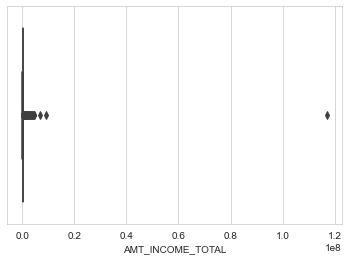

In [50]:
sns.boxplot(app_data2.AMT_INCOME_TOTAL);
# As there are outliers we should go with median for analysis and divide into groups 

- outliers are the values which are two low or too high compared to another values in the same column
- we have to take  care of outliers because it create disturbance while analysing
- outliers are generally happens for the continous columns
- outliers are spotted by boxplot method
- we can create bins to analyse the outlier containing columns


In [51]:
# dividing into groups by quartiles
app_data2['AMT_INCOME_TOTAL'].quantile([0,0.1,0.3,0.6,0.8,1])

0.00       25650.00
0.10       90000.00
0.30      121500.00
0.60      180000.00
0.80      225000.00
1.00   117000000.00
Name: AMT_INCOME_TOTAL, dtype: float64

In [52]:
# naming the groups
app_data2['AMT_INCOME_TOTAL_GROUP']=pd.qcut(app_data1['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['Income_verylow','Income_low','Income_medium','Income_high','Income_verhigh'])

In [53]:
#checking the group and its values
app_data2.groupby('AMT_INCOME_TOTAL_GROUP').count()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
AMT_INCOME_TOTAL_GROUP                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Income_verylow               17377   17377               17377        17377         17377            17377         17377             17377       17377        17377            17330            17295             17377                17377               17377              17377                       17377       17377          17377              17377            17377       17377           17377            17377             17377       17377       17377            17377            17377                 17377                        17377                       17377                    17377                       17377                       17377                        17377                   17377                   17377                    17377              17377         17332         12670                     17322                     17322                     17322                     17322                   17377            17377            17377            17377            17377   
Income_low                   44075   44075               44075        44075         44075            44075         44075             44075       44075        44073            43999            43872             44075                44075               44075              44075                       44075       44075          44075              44075            44075       44075           44075            44075             44075       44075       44075            44075            44075                 44075                        44075                       44075                    44075                       44075                       44075                        44075                   44075                   44075                    44075              44075         43950         33848                     43943                     43943                     43943                     43943                   44075            44075            44075            44075            44075   
Income_medium                58845   588

# AMT_CREDIT

In [54]:
# checking null values
app_data2.AMT_CREDIT.isnull().sum()

0

In [55]:
#checking count in each category
app_data2.AMT_CREDIT.value_counts()

450000.00     7306
675000.00     5910
180000.00     5749
270000.00     5549
225000.00     5349
              ... 
443664.00        1
1054755.00       1
1018336.50       1
487318.50        1
743863.50        1
Name: AMT_CREDIT, Length: 5102, dtype: int64

In [56]:
# checking datatype
app_data2.AMT_CREDIT.dtype

dtype('float64')

In [57]:
pd.options.display.float_format = "{:.2f}".format
app_data2.AMT_CREDIT.describe()

count    211120.00
mean     610301.57
std      405749.02
min       45000.00
25%      277969.50
50%      521280.00
75%      824823.00
max     4050000.00
Name: AMT_CREDIT, dtype: float64

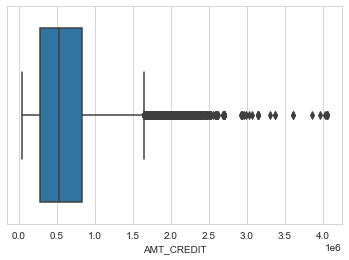

In [58]:
sns.boxplot(app_data2.AMT_CREDIT);
# As there are outliers we should go with median for analysis and divide into groups 

In [59]:
# dividing into groups by quartiles
app_data2['AMT_CREDIT'].quantile([0,0.1,0.3,0.6,0.8,1])

0.00     45000.00
0.10    180000.00
0.30    315000.00
0.60    630000.00
0.80    904500.00
1.00   4050000.00
Name: AMT_CREDIT, dtype: float64

In [60]:
# naming the groups
app_data2['AMT_CREDIT_GROUP']=pd.qcut(app_data2['AMT_INCOME_TOTAL'],q=[0,0.1,0.3,0.6,0.8,1],labels=['Credit_verylow','Credit_low','Credit_medium','Credit_high','Credit_verhigh'])

In [61]:
#checking the group and its values
app_data2.groupby('AMT_CREDIT_GROUP').count()

SK_ID_CURR  TARGET  NAME_CONTRACT_TYPE  CODE_GENDER  FLAG_OWN_CAR  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE  NAME_INCOME_TYPE  NAME_EDUCATION_TYPE  NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL  OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY  ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
AMT_CREDIT_GROUP                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             
Credit_verylow         32999   32999               32999        32999         32999            32999         32999             32999       32999        32998            32920            32841             32999                32999               32999              32999                       32999       32999          32999              32999            32999       32999           32999            32999             32999       32999       32999            32999            32999                 32999                        32999                       32999                    32999                       32999                       32999                        32999                   32999                   32999                    32999              32999         32906         24454                     32899                     32899                     32899                     32899                   32999            32999            32999            32999            32999   
Credit_low             32807   32807               32807        32807         32807            32807         32807             32807       32807        32806            32757            32654             32807                32807               32807              32807                       32807       32807          32807              32807            32807       32807           32807            32807             32807       32807       32807            32807            32807                 32807                        32807                       32807                    32807                       32807                       32807                        32807                   32807                   32807                    32807              32807         32722         25528                     32712                     32712                     32712                     32712                   32807            32807            32807            32807            32807   
Credit_medium          76927   76927               76927  

# DAYS_BIRTH

In [62]:
# checking null values
app_data2.DAYS_BIRTH.isnull().sum()

0

In [63]:
#checking count in each category
app_data2.DAYS_BIRTH.value_counts()

-14267    38
-13584    36
-13749    36
-13481    36
-14776    34
          ..
-23959     1
-23671     1
-22038     1
-24998     1
-24319     1
Name: DAYS_BIRTH, Length: 16281, dtype: int64

- In this column there are -ve values so it should be removed to analyse the data


In [64]:
#removing - from starting of value
app_data2['DAYS_BIRTH_nosign'] =app_data2['DAYS_BIRTH'].map(lambda x: str(x)[1:]).astype(int)

In [65]:
app_data2['DAYS_BIRTH_nosign']

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307504    16705
307506     9327
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH_nosign, Length: 211120, dtype: int32

- converting the days to years so that it become easy to analyse the data

In [66]:
# converting days to years
app_data2['DAYS_BIRTH_year']=abs(app_data2['DAYS_BIRTH_nosign'])//365.25
app_data2['DAYS_BIRTH_year']

0        25.00
1        45.00
2        52.00
3        52.00
4        54.00
          ... 
307504   45.00
307506   25.00
307508   40.00
307509   32.00
307510   46.00
Name: DAYS_BIRTH_year, Length: 211120, dtype: float64

In [67]:
# checking datatype
app_data2.DAYS_BIRTH_year.dtype

dtype('float64')

In [68]:
pd.options.display.float_format = "{:.2f}".format
app_data2.DAYS_BIRTH_year.describe()

count   211120.00
mean        39.92
std          9.97
min         20.00
25%         32.00
50%         39.00
75%         48.00
max         68.00
Name: DAYS_BIRTH_year, dtype: float64

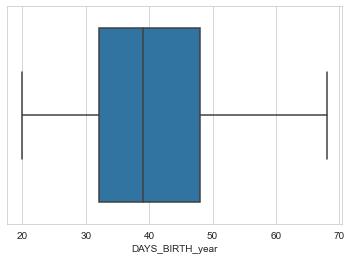

In [69]:
sns.boxplot(app_data2.DAYS_BIRTH_year);
# As there are no outliers we should go with mean for analysis

In [70]:
# dividing into groups by quartiles
app_data2['DAYS_BIRTH_year'].quantile([0,0.1,0.3,0.6,0.8,1])

0.00   20.00
0.10   27.00
0.30   33.00
0.60   42.00
0.80   49.00
1.00   68.00
Name: DAYS_BIRTH_year, dtype: float64

In [71]:
app_data2['DAYS_BIRTH_year_GROUP']=pd.qcut(app_data2['DAYS_BIRTH_year'],q=[0,0.1,0.3,0.6,0.8,1],labels=['year_20-27','year_27-33','year_33-42','year_42-49','year_49-68'])

# CNT_FAM_MEMBERS

In [72]:
# checking null values
app_data2.CNT_FAM_MEMBERS.isnull().sum()

2

In [73]:
app_data2.CNT_FAM_MEMBERS.value_counts()

2.00     103386
3.00      43489
1.00      40262
4.00      20735
5.00       2841
6.00        310
7.00         65
8.00         12
9.00          6
10.00         3
14.00         2
20.00         2
13.00         1
12.00         1
15.00         1
16.00         1
11.00         1
Name: CNT_FAM_MEMBERS, dtype: int64

- I am removing the 2 null values as they are very small in number compared to total

In [74]:
#Replacing 2 family members as they are high for 2 null values
app_data2["CNT_FAM_MEMBERS"].fillna(2, inplace = True)

In [75]:
# checking null values
app_data2.CNT_FAM_MEMBERS.isnull().sum()

0

In [76]:
# checking datatype
app_data2.CNT_FAM_MEMBERS.dtype

dtype('float64')

In [77]:
pd.options.display.float_format = "{:.2f}".format
app_data2.CNT_FAM_MEMBERS.describe()

count   211120.00
mean         2.26
std          0.94
min          1.00
25%          2.00
50%          2.00
75%          3.00
max         20.00
Name: CNT_FAM_MEMBERS, dtype: float64

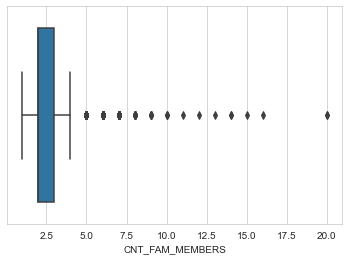

In [78]:
sns.boxplot(app_data2.CNT_FAM_MEMBERS);
# As there are outliers we should go with median for analysis and divide into groups 

In [79]:
Q1=app_data2['CNT_FAM_MEMBERS'].quantile(0.25)
Q3=app_data2['CNT_FAM_MEMBERS'].quantile(0.75)

IQR=Q3-Q1

print("Q1 is " + str(Q1))
print("Q3 is " + str(Q3))
print("IQR is " + str(IQR))

Lower_Whisker = Q1- 1.5*IQR
Upper_Whisker = Q3 + 1.5*IQR

print("Lower_Whisker is " + str(Lower_Whisker)," and   Upper_Whisker is " + str(Upper_Whisker))

Q1 is 2.0
Q3 is 3.0
IQR is 1.0
Lower_Whisker is 0.5  and   Upper_Whisker is 4.5


- There are outliers in these column so iam removing the values which are more than upper whisker i.e 4.5

In [80]:
#dropping count more than 5 to avoid outliers
app_data3 = app_data2[app_data2['CNT_FAM_MEMBERS']<5]
app_data3

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  \
0           100002       1         Cash loans           M            N               Y             0         202500.00   406597.50     24700.50        351000.00   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.02       -9461           -637           -3648.00            -2120           1               1                0                 1           1           0        Laborers             1.00                     2                            2                  WEDNESDAY                       10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.26          0.14                      2.00                      2.00                      2.00                      2.00                -1134.00                0                1                0                0   
1           100003       0         Cash loans           F            N               N             0         270000.00  1293502.50     35698.50       1129500.00          Family         State servant               Higher education               Married  House / apartment                        0.00      -16765          -1188           -1186.00             -291           1               1                0                 1           1           0      Core staff             2.00                     1                            1                     MONDAY                       11                           0                           0                            0                       0                       0                        0                  School          0.62           NaN                      1.00                      0.00                      1.00                      0.00                 -828.00                0                1                0                0   
2           100004       0    Revolving loans           M            Y               Y             0          67500.00   135000.00      6750.00        135000.00   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.01      -19046           -225           -4260.00            -2531           1               1                1                 1           1           0        Laborers             1.00                     2                            2                     MONDAY                        9                           0                           0                            0                       0                       0                        0              Government          0.56          0.73                      0.00                      0.00                      0.00                      0.00                 -815.00                0                0                0                0   
3           100006       0      

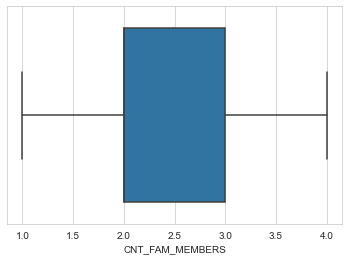

In [81]:
sns.boxplot(app_data3.CNT_FAM_MEMBERS);

In [82]:
# analysing any replication in dataset

app_data3[app_data3.duplicated()]

Empty DataFrame
Columns: [SK_ID_CURR, TARGET, NAME_CONTRACT_TYPE, CODE_GENDER, FLAG_OWN_CAR, FLAG_OWN_REALTY, CNT_CHILDREN, AMT_INCOME_TOTAL, AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE, NAME_TYPE_SUITE, NAME_INCOME_TYPE, NAME_EDUCATION_TYPE, NAME_FAMILY_STATUS, NAME_HOUSING_TYPE, REGION_POPULATION_RELATIVE, DAYS_BIRTH, DAYS_EMPLOYED, DAYS_REGISTRATION, DAYS_ID_PUBLISH, FLAG_MOBIL, FLAG_EMP_PHONE, FLAG_WORK_PHONE, FLAG_CONT_MOBILE, FLAG_PHONE, FLAG_EMAIL, OCCUPATION_TYPE, CNT_FAM_MEMBERS, REGION_RATING_CLIENT, REGION_RATING_CLIENT_W_CITY, WEEKDAY_APPR_PROCESS_START, HOUR_APPR_PROCESS_START, REG_REGION_NOT_LIVE_REGION, REG_REGION_NOT_WORK_REGION, LIVE_REGION_NOT_WORK_REGION, REG_CITY_NOT_LIVE_CITY, REG_CITY_NOT_WORK_CITY, LIVE_CITY_NOT_WORK_CITY, ORGANIZATION_TYPE, EXT_SOURCE_2, EXT_SOURCE_3, OBS_30_CNT_SOCIAL_CIRCLE, DEF_30_CNT_SOCIAL_CIRCLE, OBS_60_CNT_SOCIAL_CIRCLE, DEF_60_CNT_SOCIAL_CIRCLE, DAYS_LAST_PHONE_CHANGE, FLAG_DOCUMENT_2, FLAG_DOCUMENT_3, FLAG_DOCUMENT_4, FLAG_DOCUMENT_5, FLAG_DOCUMENT_6, FLAG_DOCUMENT_7, FLAG_DOCUMENT_8, FLAG_DOCUMENT_9, FLAG_DOCUMENT_10, FLAG_DOCUMENT_11, FLAG_DOCUMENT_12, FLAG_DOCUMENT_13, FLAG_DOCUMENT_14, FLAG_DOCUMENT_15, FLAG_DOCUMENT_16, FLAG_DOCUMENT_17, FLAG_DOCUMENT_18, FLAG_DOCUMENT_19, FLAG_DOCUMENT_20, FLAG_DOCUMENT_21, AMT_REQ_CREDIT_BUREAU_HOUR, AMT_REQ_CREDIT_BUREAU_DAY, AMT_REQ_CREDIT_BUREAU_WEEK, AMT_REQ_CREDIT_BUREAU_MON, AMT_REQ_CREDIT_BUREAU_QRT, AMT_REQ_CREDIT_BUREAU_YEAR, AMT_INCOME_TOTAL_GROUP, AMT_CREDIT_GROUP, DAYS_BIRTH_nosign, DAYS_BIRTH_year, DAYS_BIRTH_year_GROUP]
Index: []

- no replicate data

# Imbalance

In [83]:
app_data3['TARGET'].value_counts(normalize=True)*100

0   91.24
1    8.76
Name: TARGET, dtype: float64

- In target column there are 91.24% clients who are good at paying their bills and 8.76 clients who are not good at paying their bills

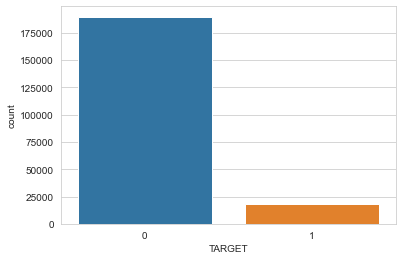

In [84]:
sns.countplot(app_data3['TARGET']);

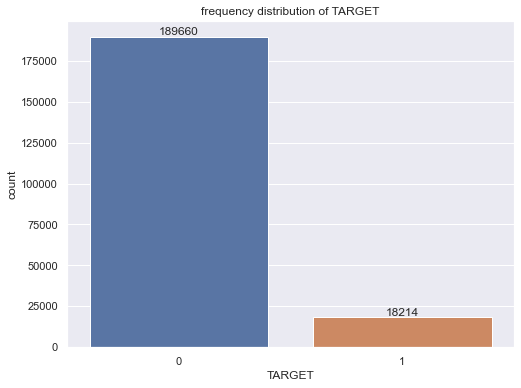

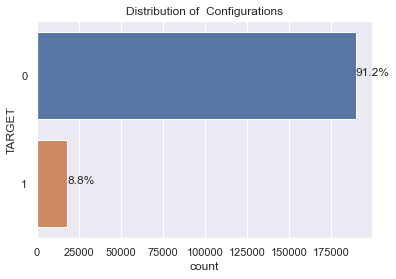

In [291]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["TARGET"])
plt.title("frequency distribution of TARGET")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
    
    
    

plt.show()



ax = sns.countplot(y="TARGET", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['TARGET'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [85]:
#Ratio of imbalance
((app_data3['TARGET']==0).sum() / (app_data3['TARGET']==1).sum())

10.412869221477983

In [86]:
round((app_data3['TARGET']==0).sum() / (app_data3['TARGET']==1).sum())

10

- ratio of imbalance is 10(10.41)

In [87]:
#checking target o and target 1
app_data3.TARGET.value_counts()

0    189660
1     18214
Name: TARGET, dtype: int64

- separating based on target values
- for the target 0 the values are stored in app_data3_tar0
- for the target 1 the values are stored on app_data3_tar1

In [88]:
# dividing target 0 and 1 as there is imbalance
app_data3_tar0 = app_data3.loc[app_data3['TARGET'] == 0 ]
app_data3_tar1 = app_data3.loc[app_data3['TARGET'] == 1 ]

- Dividing the column based on catatory and continous column only for selected columns for analysis
- catagory columns are stored in app_data3_cat
- continous columns are stored in app_data3_cont

In [89]:
#category column list
app_data3_cat=["NAME_CONTRACT_TYPE","CODE_GENDER","FLAG_OWN_CAR","FLAG_OWN_REALTY","OCCUPATION_TYPE","NAME_HOUSING_TYPE","NAME_EDUCATION_TYPE"]

In [90]:
#continuous column list
app_data3_cont=["AMT_INCOME_TOTAL","AMT_CREDIT","DAYS_BIRTH_year","CNT_FAM_MEMBERS"]

# univariate analysis

- univariate analysis is the analysis done for only 1 variable 
- There are two types in univariate analysis 
- 1)univariate catogory variable analysis
- 2)univariate continous variable analysis

# univariate analysis for the category data

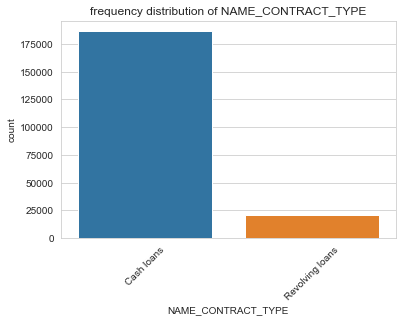

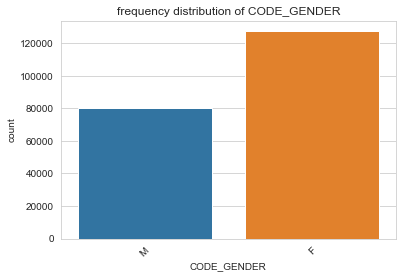

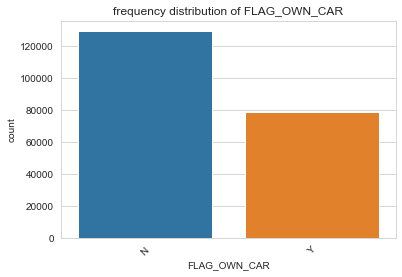

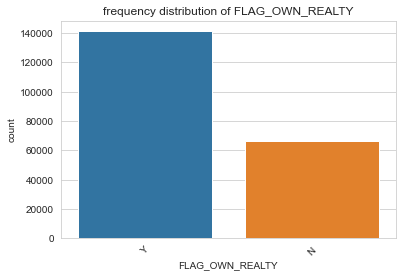

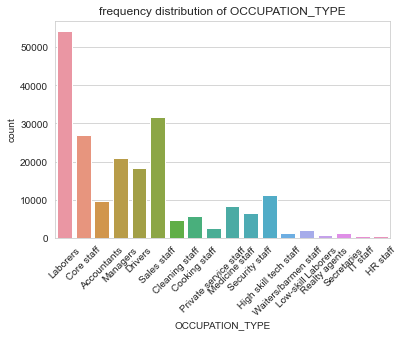

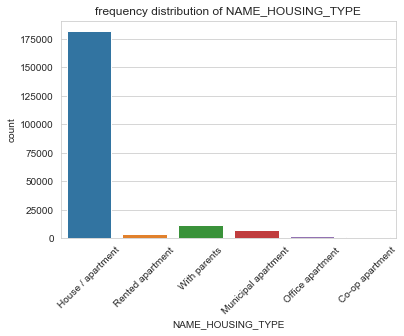

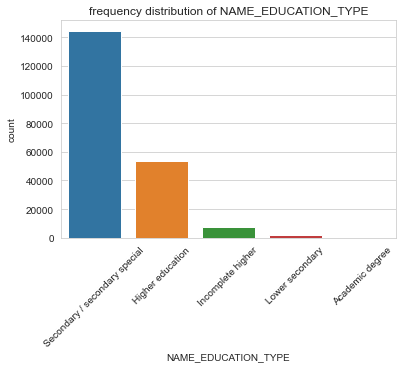

In [91]:
#overall analysis

for i in app_data3_cat:
    sns.countplot(app_data3[i])
    plt.title("frequency distribution of "+i)
    plt.xticks(rotation=45)
    plt.show()

# Individual column analysis

# univariate analysis for the NAME_CONTRACT_TYPE data

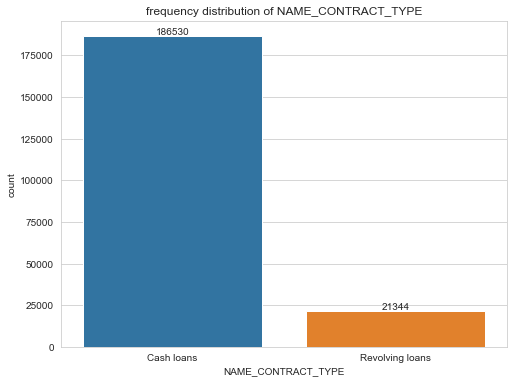

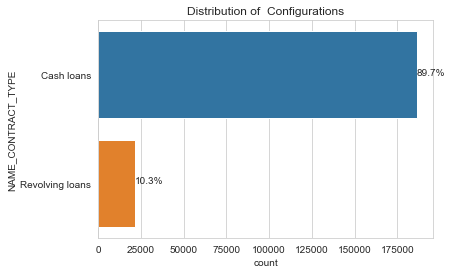

In [92]:
#univariate analysis for the NAME_CONTRACT_TYPE data
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["NAME_CONTRACT_TYPE"])
plt.title("frequency distribution of NAME_CONTRACT_TYPE")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
    
    
    

plt.show()



ax = sns.countplot(y="NAME_CONTRACT_TYPE", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['NAME_CONTRACT_TYPE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- Here we can see that the cash loan are significantly more when compare to the Revolving loans i.e cash loans are 89.7% and Resolving loans are 10.3%

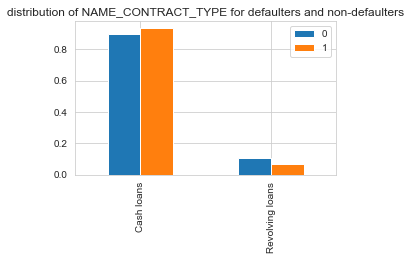

In [93]:
fig = plt.figure(figsize=(8,6))
ax3 = plt.subplot(223)
app_data5=pd.DataFrame()
app_data5['0'] = ((app_data3_tar0["NAME_CONTRACT_TYPE"].value_counts())/len(app_data3_tar0))
app_data5['1'] = ((app_data3_tar1["NAME_CONTRACT_TYPE"].value_counts())/len(app_data3_tar1))
app_data5.plot.bar(ax=ax3)
plt.title('distribution of NAME_CONTRACT_TYPE for defaulters and non-defaulters')
fig.tight_layout()
plt.show()



- I am assuming   non defaulters-0, defaulters-1
- For cash loans the  defaulters are more compared to non-defaulters
- For Revolving loans non-defaulters are more compared to defaulters

# univariate analysis for the CODE_GENDER data
    

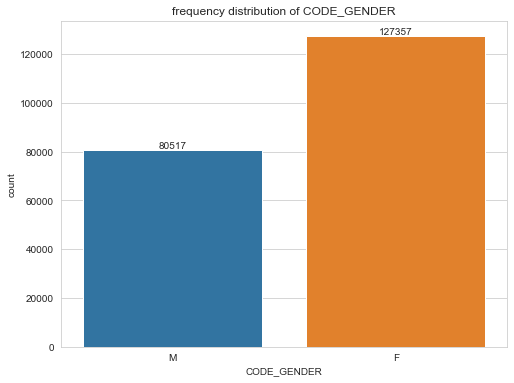

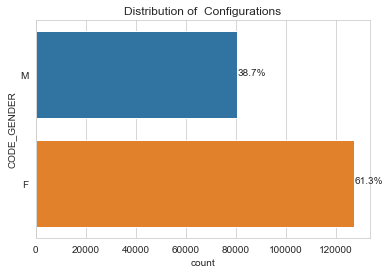

In [94]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["CODE_GENDER"])
plt.title("frequency distribution of CODE_GENDER")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="CODE_GENDER", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['CODE_GENDER'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- Here we can see that the Females(61.3%) are more compared to males(38.7%)

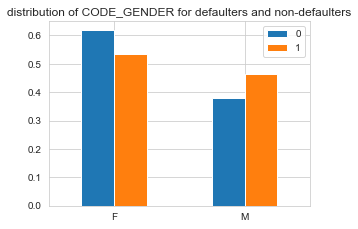

In [95]:
fig = plt.figure(figsize=(8,6))
ax3 = plt.subplot(223)
app_data6=pd.DataFrame()
app_data6['0'] = ((app_data3_tar0["CODE_GENDER"].value_counts())/len(app_data3_tar0))
app_data6['1'] = ((app_data3_tar1["CODE_GENDER"].value_counts())/len(app_data3_tar1))
app_data6.plot.bar(ax=ax3)
plt.title('distribution of CODE_GENDER for defaulters and non-defaulters')
plt.xticks(rotation=0)
fig.tight_layout() 
plt.show()

- The female non Defaulters are more compared to female defaulters
- The male defaulters are more compared to male non defaulters

# univariate analysis for the FLAG_OWN_CAR data

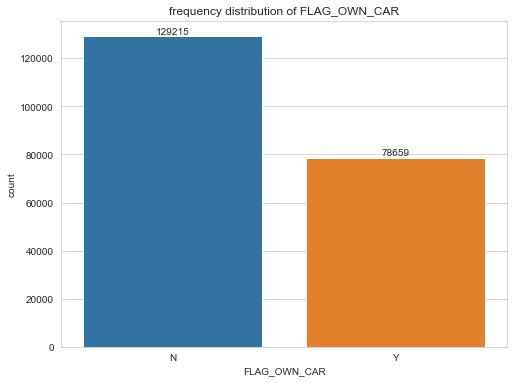

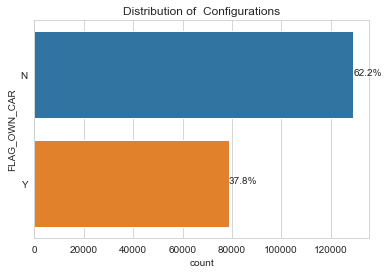

In [96]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["FLAG_OWN_CAR"])
plt.title("frequency distribution of FLAG_OWN_CAR")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="FLAG_OWN_CAR", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['FLAG_OWN_CAR'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- Here the persons who are not having car(62.3%) are more compared to persons having car(37.8%)

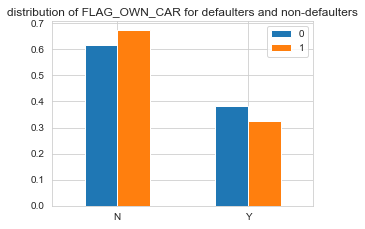

In [97]:
fig = plt.figure(figsize=(8,6))
ax3 = plt.subplot(223)
app_data7=pd.DataFrame()
app_data7['0'] = ((app_data3_tar0["FLAG_OWN_CAR"].value_counts())/len(app_data3_tar0))
app_data7['1'] = ((app_data3_tar1["FLAG_OWN_CAR"].value_counts())/len(app_data3_tar1))
app_data7.plot.bar(ax=ax3)
plt.title('distribution of FLAG_OWN_CAR for defaulters and non-defaulters')
plt.xticks(rotation=0)
fig.tight_layout() 
plt.show()

- The persons who has car is more in non-defaulters compared to person who doesn't has car

# univariate analysis for the FLAG_OWN_REALTY data

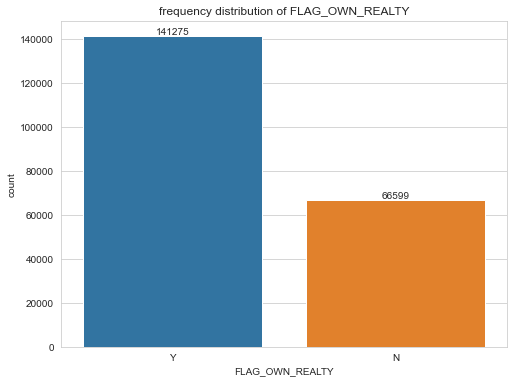

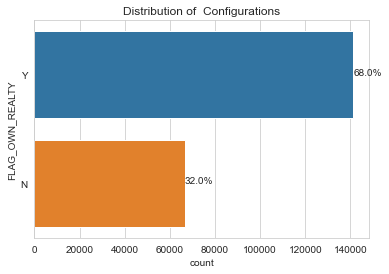

In [98]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["FLAG_OWN_REALTY"])
plt.title("frequency distribution of FLAG_OWN_REALTY")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="FLAG_OWN_REALTY", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['FLAG_OWN_REALTY'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- Here the persons who are having house(68.0%) are more than persons who are not having cars(32.0%)

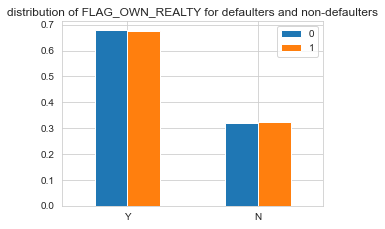

In [99]:
fig = plt.figure(figsize=(8,6))
ax3 = plt.subplot(223)
app_data8=pd.DataFrame()
app_data8['0'] = ((app_data3_tar0["FLAG_OWN_REALTY"].value_counts())/len(app_data3_tar0))
app_data8['1'] = ((app_data3_tar1["FLAG_OWN_REALTY"].value_counts())/len(app_data3_tar1))
app_data8.plot.bar(ax=ax3)
plt.title('distribution of FLAG_OWN_REALTY for defaulters and non-defaulters')
plt.xticks(rotation=0)
fig.tight_layout() 
plt.show()

- The person who having the house are more non defaulter compared to person who doesn't has house

# univariate analysis for the OCCUPATION_TYPE data

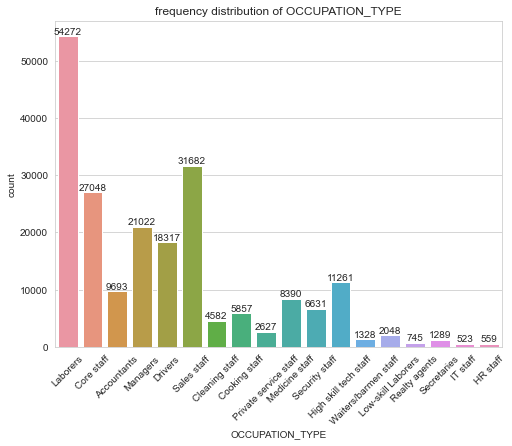

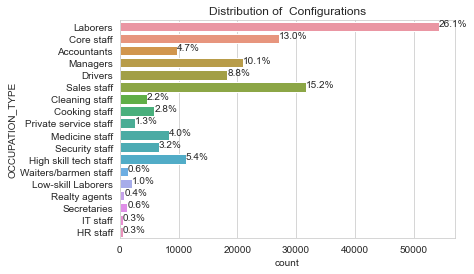

In [100]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["OCCUPATION_TYPE"])
plt.title("frequency distribution of OCCUPATION_TYPE")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="OCCUPATION_TYPE", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['OCCUPATION_TYPE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- here the laborers are more with 26.1% followed by sales staff with 15.2% followed by core staff with 13.0%

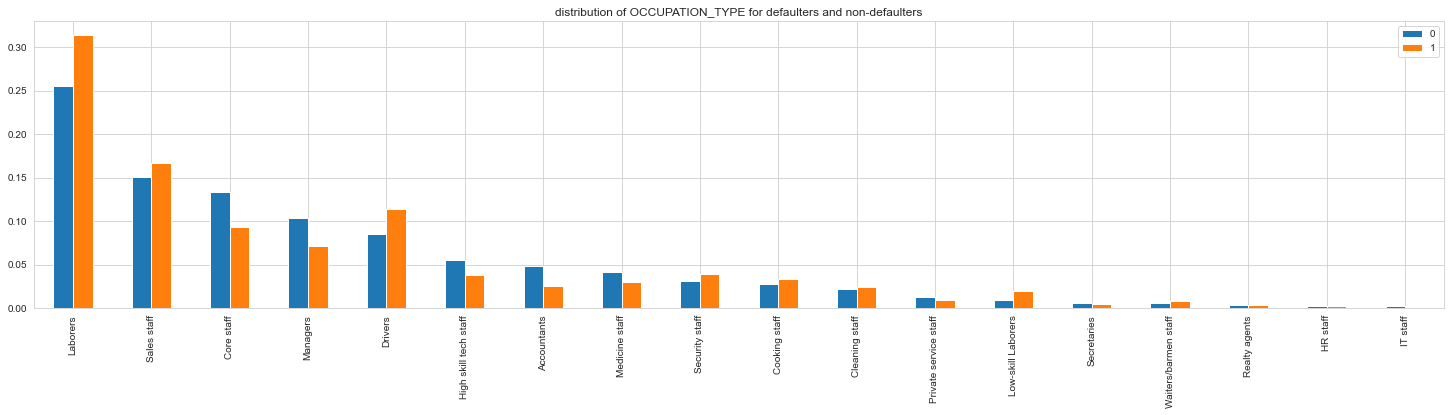

In [101]:
fig = plt.figure(figsize=(40,10))
ax3 = plt.subplot(223)
app_data9=pd.DataFrame()
app_data9['0'] = ((app_data3_tar0["OCCUPATION_TYPE"].value_counts())/len(app_data3_tar0))
app_data9['1'] = ((app_data3_tar1["OCCUPATION_TYPE"].value_counts())/len(app_data3_tar1))
app_data9.plot.bar(ax=ax3)
plt.title('distribution of OCCUPATION_TYPE for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

 - The core staff , managers,high skilled tech staff,accountants,medicine staff,private service staff, non defaulters are more compared to others

# univariate analysis for the NAME_HOUSING_TYPE data

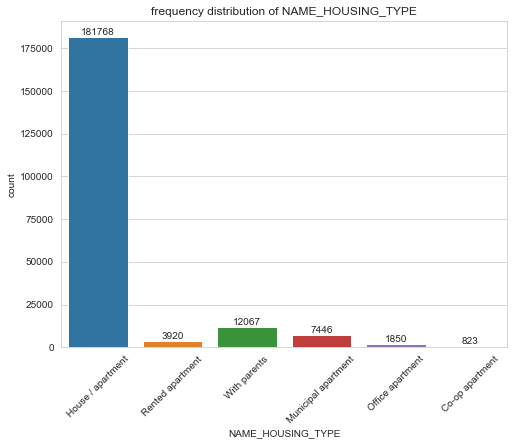

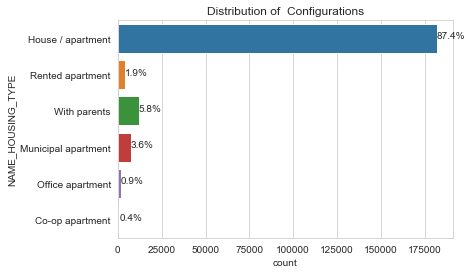

In [102]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["NAME_HOUSING_TYPE"])
plt.title("frequency distribution of NAME_HOUSING_TYPE")
plt.xticks(rotation=45)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_HOUSING_TYPE", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['NAME_HOUSING_TYPE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- Here the apartments are more compared to other housing types with 87.4%  

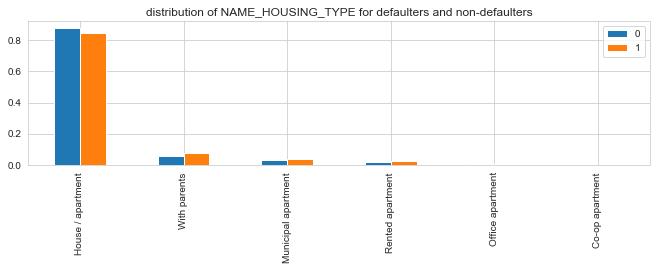

In [103]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data10=pd.DataFrame()
app_data10['0'] = ((app_data3_tar0["NAME_HOUSING_TYPE"].value_counts())/len(app_data3_tar0))
app_data10['1'] = ((app_data3_tar1["NAME_HOUSING_TYPE"].value_counts())/len(app_data3_tar1))
app_data10.plot.bar(ax=ax3)
plt.title('distribution of NAME_HOUSING_TYPE for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

- Here persons who has apartments are more non defaulters compared to other


# univariate analysis for the NAME_EDUCATION_TYPE data

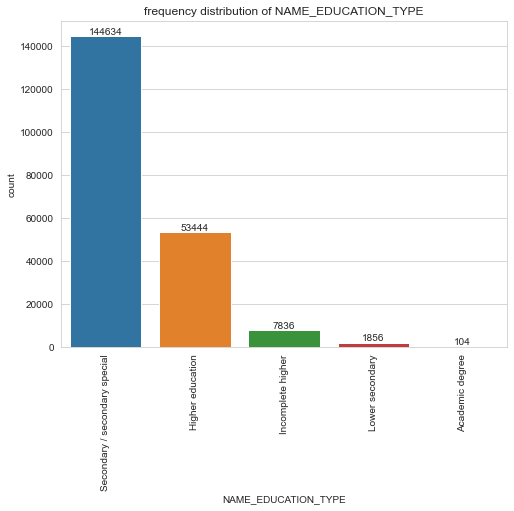

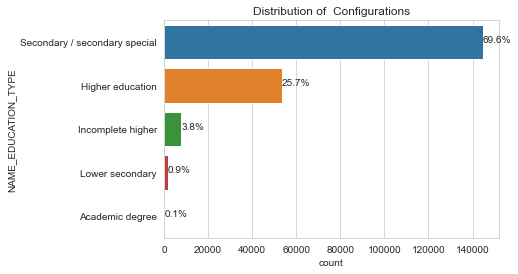

In [104]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["NAME_EDUCATION_TYPE"])
plt.title("frequency distribution of NAME_EDUCATION_TYPE")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_EDUCATION_TYPE", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['NAME_EDUCATION_TYPE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The persons who are studied secondary are more with 69.6% followed by higher education with 25.7%

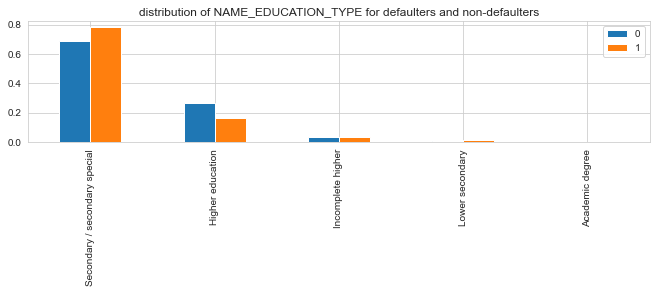

In [105]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data11=pd.DataFrame()
app_data11['0'] = ((app_data3_tar0["NAME_EDUCATION_TYPE"].value_counts())/len(app_data3_tar0))
app_data11['1'] = ((app_data3_tar1["NAME_EDUCATION_TYPE"].value_counts())/len(app_data3_tar1))
app_data11.plot.bar(ax=ax3)
plt.title('distribution of NAME_EDUCATION_TYPE for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

- The persons who have completed Higher education are having more non defaulters compared to others

# Correlation


In [106]:
#for target 0
correlation_0 = app_data3_tar0.corr().abs().unstack().sort_values(kind = 'quicksort').dropna()
correlation_1 = correlation_0[correlation_0!= 1.0]
correlation_1.tail(10)

REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.95
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.95
AMT_GOODS_PRICE              AMT_CREDIT                    0.99
AMT_CREDIT                   AMT_GOODS_PRICE               0.99
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      1.00
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      1.00
DAYS_BIRTH_year              DAYS_BIRTH                    1.00
                             DAYS_BIRTH_nosign             1.00
DAYS_BIRTH_nosign            DAYS_BIRTH_year               1.00
DAYS_BIRTH                   DAYS_BIRTH_year               1.00
dtype: float64

In [281]:
#for target 1
correlation_2 = app_data3_tar1.corr().abs().unstack().sort_values(kind = 'quicksort').dropna()
correlation_3 = correlation_2[correlation_2!= 1.0]
correlation_3.tail(10)

REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT          0.96
REGION_RATING_CLIENT         REGION_RATING_CLIENT_W_CITY   0.96
AMT_CREDIT                   AMT_GOODS_PRICE               0.98
AMT_GOODS_PRICE              AMT_CREDIT                    0.98
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE      1.00
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE      1.00
DAYS_BIRTH_year              DAYS_BIRTH                    1.00
                             DAYS_BIRTH_nosign             1.00
DAYS_BIRTH                   DAYS_BIRTH_year               1.00
DAYS_BIRTH_nosign            DAYS_BIRTH_year               1.00
dtype: float64

# univariate analysis for the continuous data

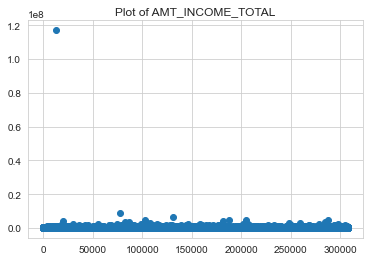

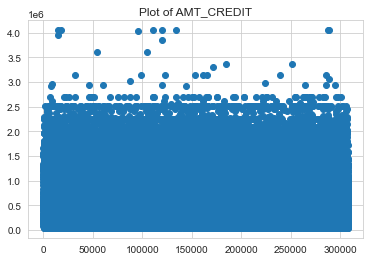

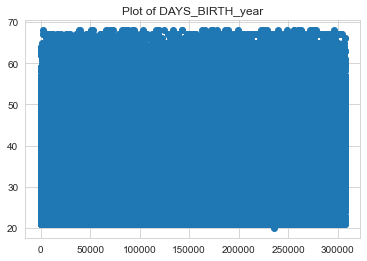

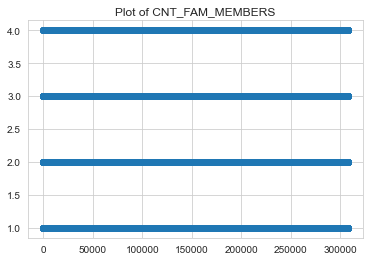

In [108]:
#overall
for i in app_data3_cont:
    plt.scatter(app_data3.index,app_data3[i])
    plt.title("Plot of "+i)
    plt.show()

# univariate analysis for the AMT_INCOME_TOTAL data

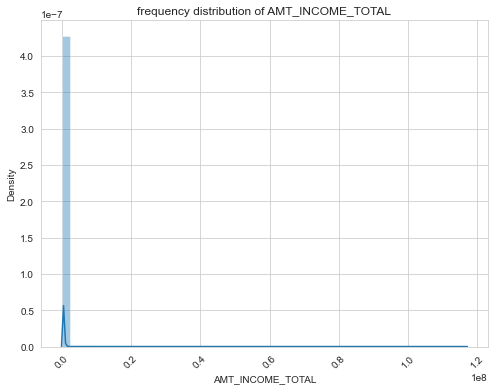

In [109]:
fig = plt.figure(figsize=(8,6))
sns.distplot(app_data3["AMT_INCOME_TOTAL"])
plt.title("frequency distribution of AMT_INCOME_TOTAL")
plt.xticks(rotation=45)
plt.show()

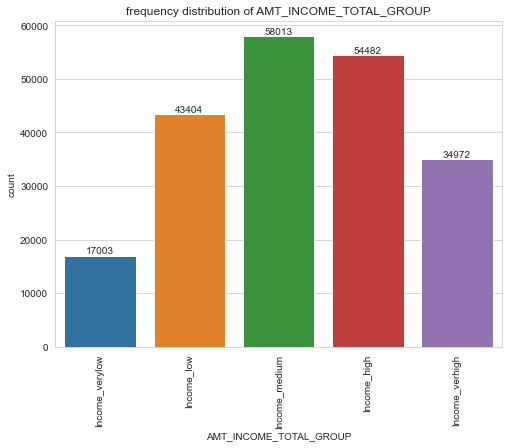

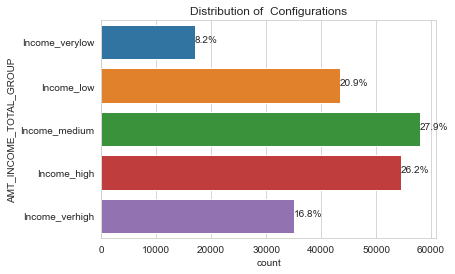

In [110]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["AMT_INCOME_TOTAL_GROUP"])
plt.title("frequency distribution of AMT_INCOME_TOTAL_GROUP")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="AMT_INCOME_TOTAL_GROUP", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['AMT_INCOME_TOTAL_GROUP'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The medium income people are more with 27.9% folllowed by high income with 26.2%

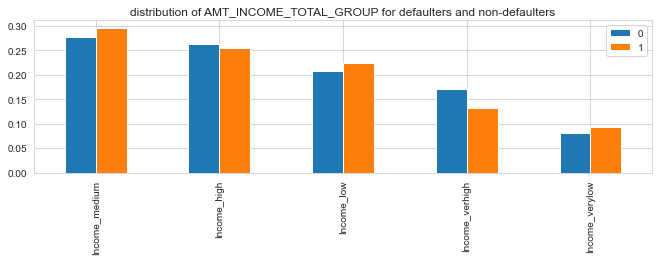

In [111]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data12=pd.DataFrame()
app_data12['0'] = ((app_data3_tar0["AMT_INCOME_TOTAL_GROUP"].value_counts())/len(app_data3_tar0))
app_data12['1'] = ((app_data3_tar1["AMT_INCOME_TOTAL_GROUP"].value_counts())/len(app_data3_tar1))
app_data12.plot.bar(ax=ax3)
plt.title('distribution of AMT_INCOME_TOTAL_GROUP for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

- The high income and very high income clients are having more non defaulters

# univariate analysis for the AMT_CREDIT data

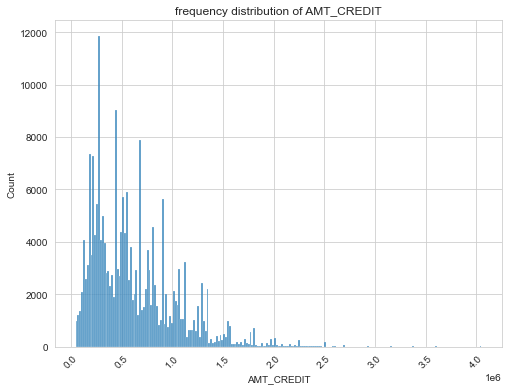

In [112]:
fig = plt.figure(figsize=(8,6))
sns.histplot(app_data3["AMT_CREDIT"])
plt.title("frequency distribution of AMT_CREDIT")
plt.xticks(rotation=45)
plt.show()

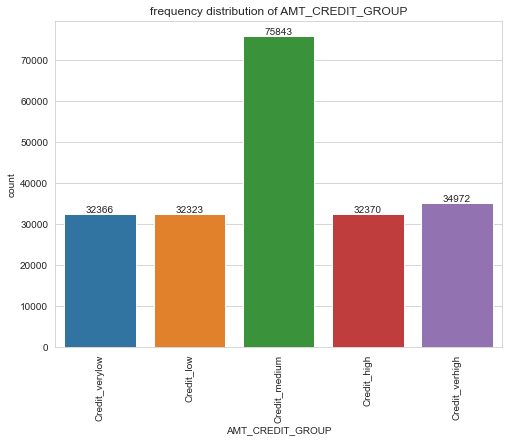

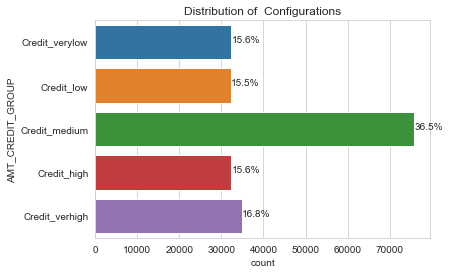

In [113]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["AMT_CREDIT_GROUP"])
plt.title("frequency distribution of AMT_CREDIT_GROUP")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="AMT_CREDIT_GROUP", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['AMT_CREDIT_GROUP'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The people who are requiring medium credit loan are more with 36.5% 

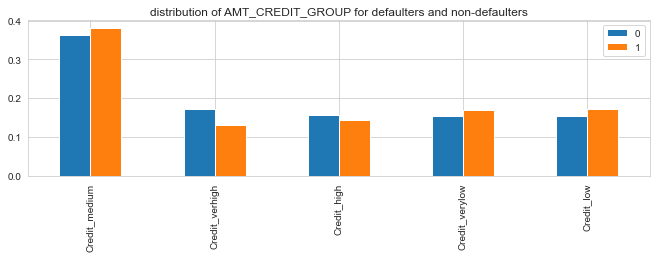

In [114]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data12=pd.DataFrame()
app_data12['0'] = ((app_data3_tar0["AMT_CREDIT_GROUP"].value_counts())/len(app_data3_tar0))
app_data12['1'] = ((app_data3_tar1["AMT_CREDIT_GROUP"].value_counts())/len(app_data3_tar1))
app_data12.plot.bar(ax=ax3)
plt.title('distribution of AMT_CREDIT_GROUP for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

- The people  who are requiring high credit and very high credit are more non defaulter when compared to others

# univariate analysis for the DAYS_BIRTH_year data

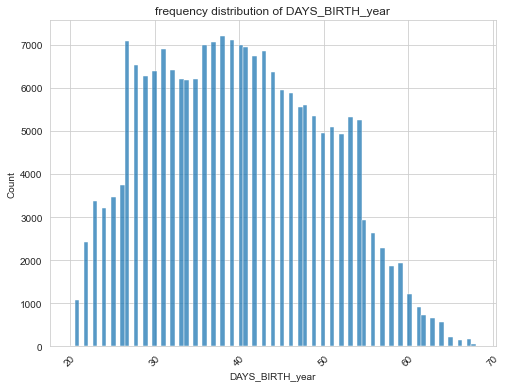

In [115]:
fig = plt.figure(figsize=(8,6))
sns.histplot(app_data3["DAYS_BIRTH_year"])
plt.title("frequency distribution of DAYS_BIRTH_year")
plt.xticks(rotation=45)
plt.show()

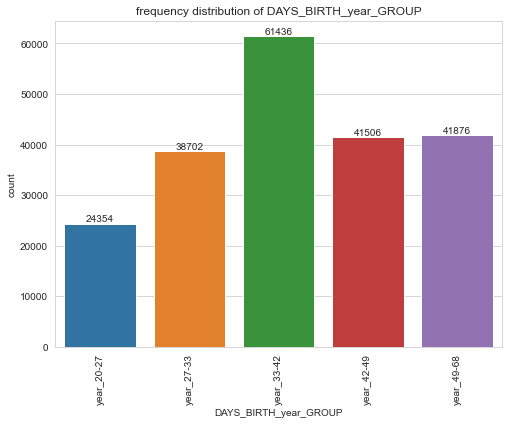

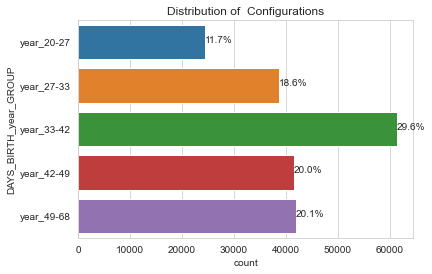

In [116]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["DAYS_BIRTH_year_GROUP"])
plt.title("frequency distribution of DAYS_BIRTH_year_GROUP")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="DAYS_BIRTH_year_GROUP", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['DAYS_BIRTH_year_GROUP'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The are more clients with 33-42 years age group with 29.6% followed by 49-68 age group with 20.1%

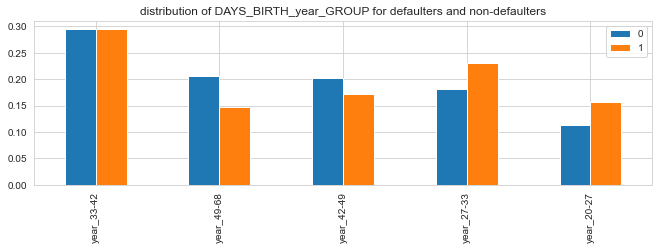

In [117]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data12=pd.DataFrame()
app_data12['0'] = ((app_data3_tar0["DAYS_BIRTH_year_GROUP"].value_counts())/len(app_data3_tar0))
app_data12['1'] = ((app_data3_tar1["DAYS_BIRTH_year_GROUP"].value_counts())/len(app_data3_tar1))
app_data12.plot.bar(ax=ax3)
plt.title('distribution of DAYS_BIRTH_year_GROUP for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

- The people who are in age group 42-49 and 49-68  are having more non defaulters

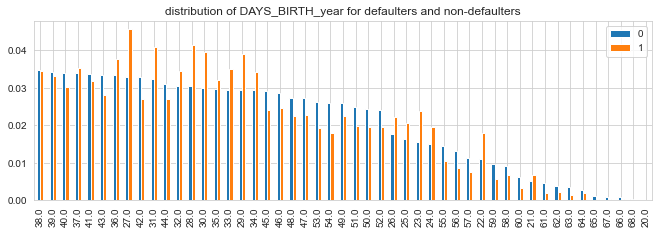

In [118]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data14=pd.DataFrame()
app_data14['0'] = ((app_data3_tar0["DAYS_BIRTH_year"].value_counts())/len(app_data3_tar0))
app_data14['1'] = ((app_data3_tar1["DAYS_BIRTH_year"].value_counts())/len(app_data3_tar1))
app_data14.plot.bar(ax=ax3)
plt.title('distribution of DAYS_BIRTH_year for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

# univariate analysis for the CNT_FAM_MEMBERS"] data

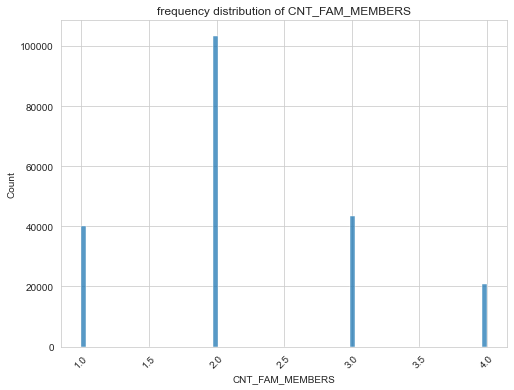

In [119]:
fig = plt.figure(figsize=(8,6))
sns.histplot(app_data3["CNT_FAM_MEMBERS"])
plt.title("frequency distribution of CNT_FAM_MEMBERS")
plt.xticks(rotation=45)
plt.show()

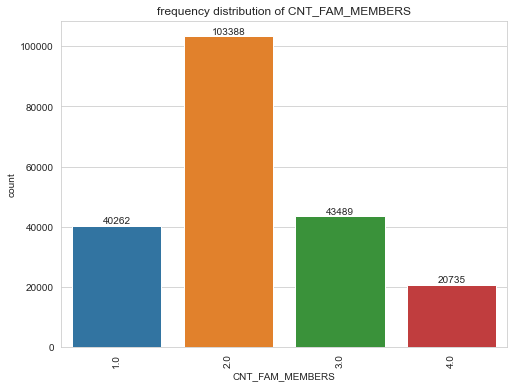

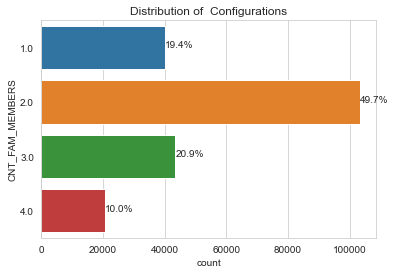

In [120]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(app_data3["CNT_FAM_MEMBERS"])
plt.title("frequency distribution of CNT_FAM_MEMBERS")
plt.xticks(rotation=90)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="CNT_FAM_MEMBERS", data=app_data3)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(app_data3['CNT_FAM_MEMBERS'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The families with 2 people are more with 49.7% followed by 3 with 20.9%

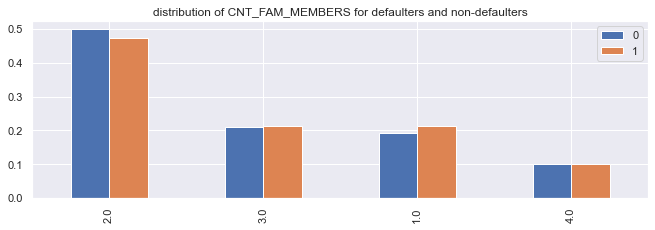

In [285]:
fig = plt.figure(figsize=(18,6))
ax3 = plt.subplot(223)
app_data15=pd.DataFrame()
app_data15['0'] = ((app_data3_tar0["CNT_FAM_MEMBERS"].value_counts())/len(app_data3_tar0))
app_data15['1'] = ((app_data3_tar1["CNT_FAM_MEMBERS"].value_counts())/len(app_data3_tar1))
app_data15.plot.bar(ax=ax3)
plt.title('distribution of CNT_FAM_MEMBERS for defaulters and non-defaulters')
fig.tight_layout() 
plt.show()

- The people who are having only 2 family members are having more non defaulters compared to other

# Bivariate analysis

- AMT_CREDIT & CNT_FAM_MEMBERS

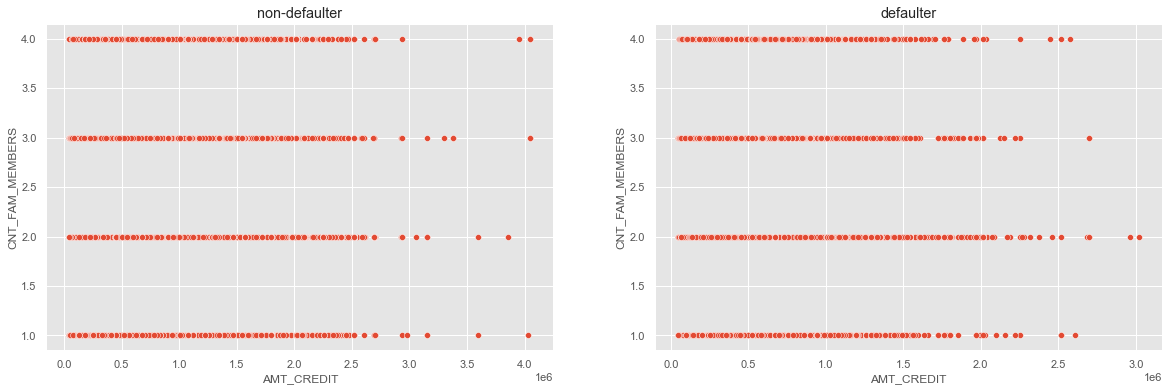

In [294]:


    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x="AMT_CREDIT", y="CNT_FAM_MEMBERS",data=app_data3_tar0,ax=ax1)
    ax1.set_xlabel("AMT_CREDIT")    
    ax1.set_ylabel("CNT_FAM_MEMBERS")
    ax1.set_title("non-defaulter")
    
    sns.scatterplot(x="AMT_CREDIT", y="CNT_FAM_MEMBERS",data=app_data3_tar1,ax=ax2)
    ax1.set_xlabel("AMT_CREDIT")    
    ax1.set_ylabel("CNT_FAM_MEMBERS")
    ax2.set_title("defaulter")
            
    plt.show()

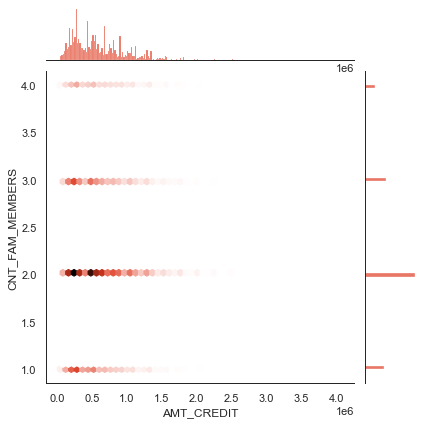

In [295]:
with sns.axes_style('white'):
    sns.jointplot("AMT_CREDIT", "CNT_FAM_MEMBERS", data=app_data3, kind='hex')

- The families with 2 people taking more credits

- AMT_CREDIT & AMT_INCOME_TOTAL

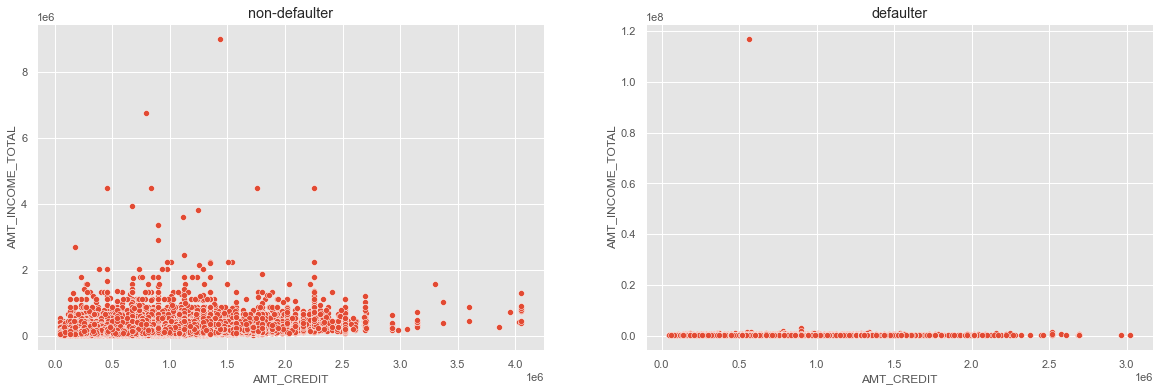

In [296]:


    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL",data=app_data3_tar0,ax=ax1)
    ax1.set_xlabel("AMT_CREDIT")    
    ax1.set_ylabel("AMT_INCOME_TOTAL")
    ax1.set_title("non-defaulter")
    
    sns.scatterplot(x="AMT_CREDIT", y="AMT_INCOME_TOTAL",data=app_data3_tar1,ax=ax2)
    ax1.set_xlabel("AMT_CREDIT")    
    ax1.set_ylabel("AMT_INCOME_TOTAL")
    ax2.set_title("defaulter")
            
    plt.show()

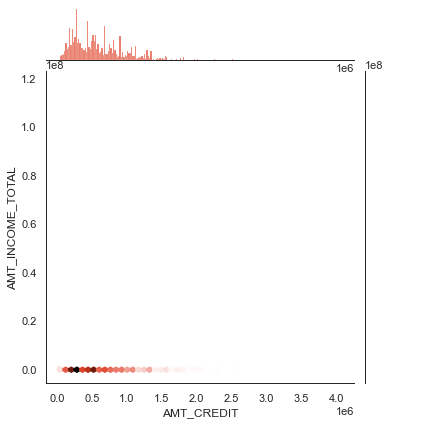

In [298]:
with sns.axes_style('white'):
    sns.jointplot("AMT_CREDIT", "AMT_INCOME_TOTAL", data=app_data3, kind='hex')

- AMT_CREDIT & CODE_GENDER

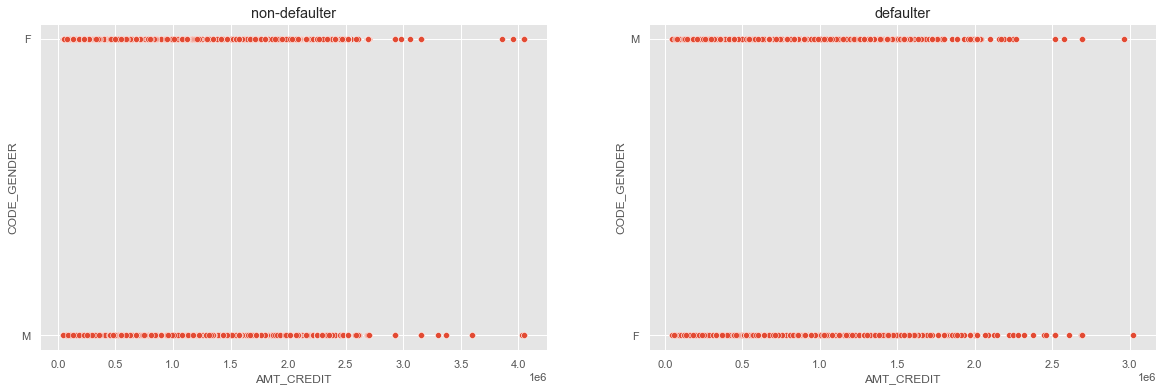

In [297]:


    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x="AMT_CREDIT", y="CODE_GENDER",data=app_data3_tar0,ax=ax1)
    ax1.set_xlabel("AMT_CREDIT")    
    ax1.set_ylabel("CODE_GENDER")
    ax1.set_title("non-defaulter")
    
    sns.scatterplot(x="AMT_CREDIT", y="CODE_GENDER",data=app_data3_tar1,ax=ax2)
    ax1.set_xlabel("AMT_CREDIT")    
    ax1.set_ylabel("CODE_GENDER")
    ax2.set_title("defaulter")
            
    plt.show()

# Data loading  of previous_application

In [123]:
prev_data=pd.read_csv("previous_application.csv")

In [124]:
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE             CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
0     2030495      271877     Consumer loans      1730.43         17145.00    17145.00              0.00         17145.00                   SATURDAY                       15                           Y                       1               0.00                   0.18                      0.87                    XAP             Approved            -73  Cash through the bank                XAP              NaN         Repeater              Mobile            POS               XNA             Country-wide                35         Connectivity        12.00           middle  POS mobile with interest           365243.00          -42.00                     300.00         -42.00            -37.00                       0.00
1     2802425      108129         Cash loans     25188.62        607500.00   679671.00               NaN        607500.00                   THURSDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -164                    XNA                XAP    Unaccompanied         Repeater                 XNA           Cash            x-sell           Contact center                -1                  XNA        36.00       low_action          Cash X-Sell: low           365243.00         -134.00                     916.00      365243.00         365243.00                       1.00
2     2523466      122040         Cash loans     15060.74        112500.00   136444.50               NaN        112500.00                    TUESDAY                       11                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -301  Cash through the bank                XAP  Spouse, partner         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00             high         Cash X-Sell: high           365243.00         -271.00                      59.00      365243.00         365243.00                       1.00
3     2819243      176158         Cash loans     47041.33        450000.00   470790.00               NaN        450000.00                     MONDAY                        7                           Y                       1                NaN                    NaN                       NaN                    XNA             Approved           -512  Cash through the bank                XAP              NaN         Repeater                 XNA           Cash            x-sell  Credit and cash offices                -1                  XNA        12.00           middle       Cash X-Sell: middle           365243.00         -482.00                    -152.00        -182.00           -177.00                       1.00
4     1784265      202054         Cash loans     31924.40        337500.00   404055.00               NaN        337500.00                   THURSDAY                        9                           Y                       1                NaN                    NaN                       NaN                Repairs              Refused           -781  Cash through the bank   

In [125]:
prev_data.describe()

SK_ID_PREV  SK_ID_CURR  AMT_ANNUITY  AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  SELLERPLACE_AREA  CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL
count  1670214.00  1670214.00   1297979.00       1670214.00  1670213.00         774370.00       1284699.00               1670214.00              1670214.00          774370.00                5951.00                   5951.00     1670214.00        1670214.00   1297984.00           997149.00       997149.00                  997149.00      997149.00         997149.00                  997149.00
mean   1923089.14   278357.17     15955.12        175233.86   196114.02           6697.40        227847.28                    12.48                    1.00               0.08                   0.19                      0.77        -880.68            313.95        16.05           342209.86        13826.27                   33767.77       76582.40          81992.34                       0.33
std     532597.96   102814.82     14782.14        292779.76   318574.62          20921.50        315396.56                     3.33                    0.06               0.11                   0.09                      0.10         779.10           7127.44        14.57            88916.12        72444.87                  106857.03      149647.42         153303.52                       0.47
min    1000001.00   100001.00         0.00             0.00        0.00             -0.90             0.00                     0.00                    0.00              -0.00                   0.03                      0.37       -2922.00             -1.00         0.00            -2922.00        -2892.00                   -2801.00       -2889.00          -2874.00                       0.00
25%    1461857.25   189329.00      6321.78         18720.00    24160.50              0.00         50841.00                    10.00                    1.00               0.00                   0.16                      0.72       -1300.00             -1.00         6.00           365243.00        -1628.00                   -1242.00       -1314.00          -1270.00                       0.00
50%    1923110.50   278714.50     11250.00         71046.00    80541.00           1638.00        112320.00                    12.00                    1.00               0.05                   0.19                      0.84        -581.00              3.00        12.00           365243.00         -831.00                    -361.00        -537.00           -499.00                       0.00
75%    2384279.75   367514.00     20658.42        180360.00   216418.50           7740.00        234000.00                    15.00                    1.00               0.11                   0.19                      0.85        -280.00             82.00        24.00           365243.00         -411.00                     129.00         -74.00            -44.00                       1.00
max    2845382.00   456255.00    418058.15       6905160.00  6905160.00        3060045.00       6905160.00                    23.00                    1.00               1.00                   1.00                      1.00          -1.00        4000000.00        84.00           365243.00       365243.00                  365243.00      365243.00         365243.00                       1.00

In [126]:
prev_data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [127]:
prev_data.shape

(1670214, 37)

In [128]:
prev_data.isnull().mean()*100

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_DOWN_PAYMENT              53.64
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
RATE_DOWN_PAYMENT             53.64
RATE_INTEREST_PRIMARY         99.64
RATE_INTEREST_PRIVILEGED      99.64
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_TYPE_SUITE               49.12
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY        

In [129]:
prev_data1 = prev_data.loc[:,prev_data.isnull().mean()<=0.4]

In [130]:
prev_data1.isnull().mean()*100

SK_ID_PREV                     0.00
SK_ID_CURR                     0.00
NAME_CONTRACT_TYPE             0.00
AMT_ANNUITY                   22.29
AMT_APPLICATION                0.00
AMT_CREDIT                     0.00
AMT_GOODS_PRICE               23.08
WEEKDAY_APPR_PROCESS_START     0.00
HOUR_APPR_PROCESS_START        0.00
FLAG_LAST_APPL_PER_CONTRACT    0.00
NFLAG_LAST_APPL_IN_DAY         0.00
NAME_CASH_LOAN_PURPOSE         0.00
NAME_CONTRACT_STATUS           0.00
DAYS_DECISION                  0.00
NAME_PAYMENT_TYPE              0.00
CODE_REJECT_REASON             0.00
NAME_CLIENT_TYPE               0.00
NAME_GOODS_CATEGORY            0.00
NAME_PORTFOLIO                 0.00
NAME_PRODUCT_TYPE              0.00
CHANNEL_TYPE                   0.00
SELLERPLACE_AREA               0.00
NAME_SELLER_INDUSTRY           0.00
CNT_PAYMENT                   22.29
NAME_YIELD_GROUP               0.00
PRODUCT_COMBINATION            0.02
dtype: float64

-Analysing some columns from prev_data1

# NAME_CONTRACT_STATUS

In [169]:
prev_data1.NAME_CONTRACT_STATUS.isnull().sum()

0

In [170]:
#checking count in each category
prev_data1.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [171]:
#checking count in each category by percentage
prev_data1.NAME_CONTRACT_STATUS.value_counts(normalize=True).mul(100)

Approved       62.07
Canceled       18.94
Refused        17.40
Unused offer    1.58
Name: NAME_CONTRACT_STATUS, dtype: float64

In [172]:
# checking datatype
prev_data1.NAME_CONTRACT_STATUS.dtype

dtype('O')

# NAME_CLIENT_TYPE

In [177]:
prev_data1.NAME_CLIENT_TYPE.isnull().sum()

0

In [178]:
#checking count in each category
prev_data1.NAME_CLIENT_TYPE.value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [185]:
#Replacing xna values
prev_data1['NAME_CLIENT_TYPE'].mask(prev_data1['NAME_CLIENT_TYPE'] == 'XNA', "Repeater", inplace=True)

In [186]:
prev_data1.NAME_CLIENT_TYPE.value_counts()

Repeater     1233202
New           301363
Refreshed     135649
Name: NAME_CLIENT_TYPE, dtype: int64

In [187]:
#checking count in each category by percentage
prev_data1.NAME_CLIENT_TYPE.value_counts(normalize=True).mul(100)

Repeater    73.83
New         18.04
Refreshed    8.12
Name: NAME_CLIENT_TYPE, dtype: float64

In [188]:
# checking datatype
prev_data1.NAME_CLIENT_TYPE.dtype

dtype('O')


# CODE_REJECT_REASON 

In [189]:
        
prev_data1.CODE_REJECT_REASON.isnull().sum()

0

In [190]:
#checking count in each category
prev_data1.CODE_REJECT_REASON.value_counts()

XAP       1353093
HC         175231
LIMIT       55680
SCO         37467
CLIENT      26436
SCOFR       12811
XNA          5244
VERIF        3535
SYSTEM        717
Name: CODE_REJECT_REASON, dtype: int64

In [191]:
#checking count in each category by percentage
prev_data1.CODE_REJECT_REASON.value_counts(normalize=True).mul(100)

XAP      81.01
HC       10.49
LIMIT     3.33
SCO       2.24
CLIENT    1.58
SCOFR     0.77
XNA       0.31
VERIF     0.21
SYSTEM    0.04
Name: CODE_REJECT_REASON, dtype: float64

In [192]:
# checking datatype
prev_data1.CODE_REJECT_REASON.dtype

dtype('O')


# NAME_CONTRACT_TYPE

In [193]:
        
prev_data1.NAME_CONTRACT_TYPE.isnull().sum()

0

In [194]:
#checking count in each category
prev_data1.NAME_CONTRACT_TYPE.value_counts()

Cash loans         747553
Consumer loans     729151
Revolving loans    193164
XNA                   346
Name: NAME_CONTRACT_TYPE, dtype: int64

In [195]:
#checking count in each category by percentage
prev_data1.NAME_CONTRACT_TYPE.value_counts(normalize=True).mul(100)

Cash loans        44.76
Consumer loans    43.66
Revolving loans   11.57
XNA                0.02
Name: NAME_CONTRACT_TYPE, dtype: float64

In [196]:
# checking datatype
prev_data1.NAME_CONTRACT_TYPE.dtype

dtype('O')

# NAME_PORTFOLIO

In [197]:
        
prev_data1.NAME_PORTFOLIO.isnull().sum()

0

In [198]:
#checking count in each category
prev_data1.NAME_PORTFOLIO.value_counts()

POS      691011
Cash     461563
XNA      372230
Cards    144985
Cars        425
Name: NAME_PORTFOLIO, dtype: int64

In [199]:
#checking count in each category by percentage
prev_data1.NAME_PORTFOLIO.value_counts(normalize=True).mul(100)

POS     41.37
Cash    27.63
XNA     22.29
Cards    8.68
Cars     0.03
Name: NAME_PORTFOLIO, dtype: float64

In [200]:
# checking datatype
prev_data1.NAME_PORTFOLIO.dtype

dtype('O')

# univariate analysis

# univariate analysis of NAME_CLIENT_TYPE

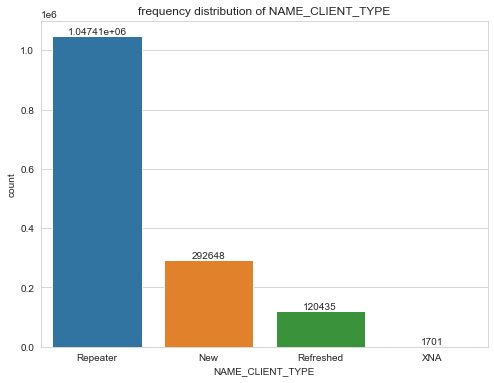

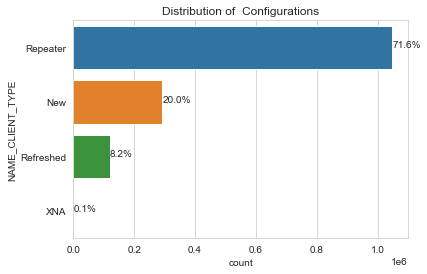

In [203]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(prev_data2["NAME_CLIENT_TYPE"])
plt.title("frequency distribution of NAME_CLIENT_TYPE")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_CLIENT_TYPE", data=prev_data2)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(prev_data2['NAME_CLIENT_TYPE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The repeater are more with 71.6% followed by new with 20% 

# univariate analysis of NAME_CONTRACT_STATUS

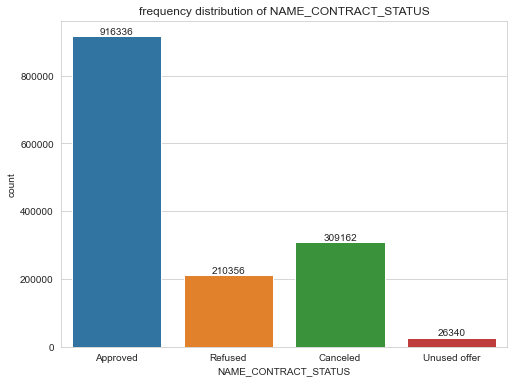

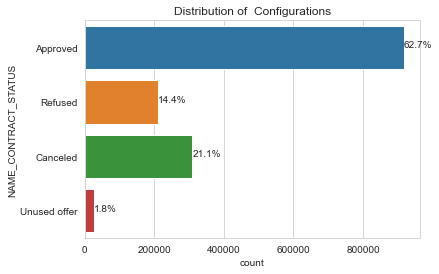

In [173]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(prev_data2["NAME_CONTRACT_STATUS"])
plt.title("frequency distribution of NAME_CONTRACT_STATUS")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_CONTRACT_STATUS", data=prev_data2)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(prev_data2['CODE_REJECT_REASON'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- Approved are more with 62.7% followed by canceled 21.1%

# univariate analysis of CODE_REJECT_REASON


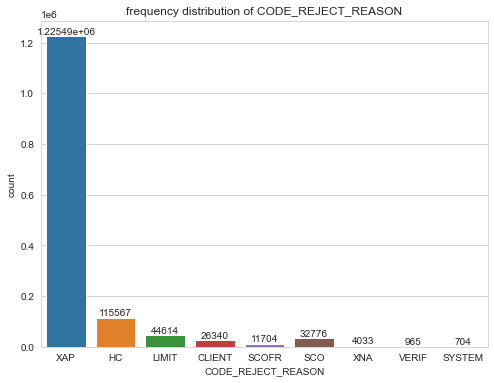

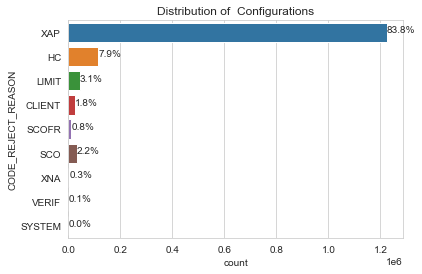

In [155]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(prev_data2["CODE_REJECT_REASON"])
plt.title("frequency distribution of CODE_REJECT_REASON")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="CODE_REJECT_REASON", data=prev_data2)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(prev_data2['CODE_REJECT_REASON'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The clients whos loan was rejected due to xap are more with 83.8% followed by HC with 7.9% 

# univariate analysis of NAME_PORTFOLIO


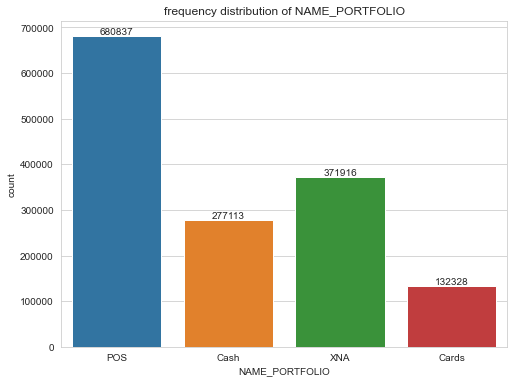

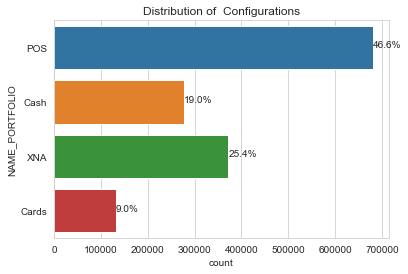

In [210]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(prev_data2["NAME_PORTFOLIO"])
plt.title("frequency distribution of NAME_PORTFOLIO")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_PORTFOLIO", data=prev_data2)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(prev_data2['NAME_PORTFOLIO'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The previous application  is pos with 46.6.% followed by XNA with 25.4%

# univariate analysis of NAME_CONTRACT_TYPE


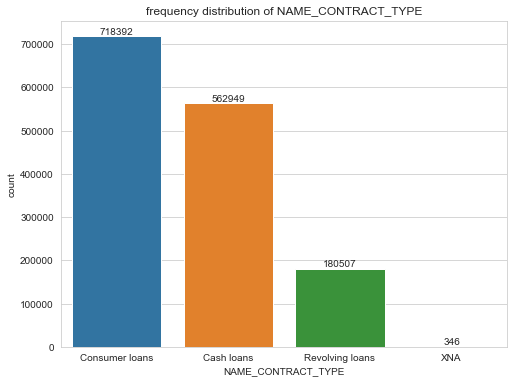

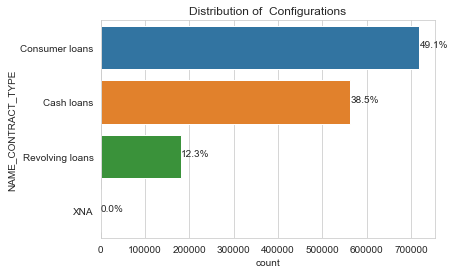

In [157]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(prev_data2["NAME_CONTRACT_TYPE"])
plt.title("frequency distribution of NAME_CONTRACT_TYPE")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_CONTRACT_TYPE", data=prev_data2)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(prev_data2['NAME_CONTRACT_TYPE'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- The consumer loans are more with 49.1% followed by cash laons 38.5%

# bivariate analysis of NAME_PORTFOLIO and NAME_CONTRACT_TYPE

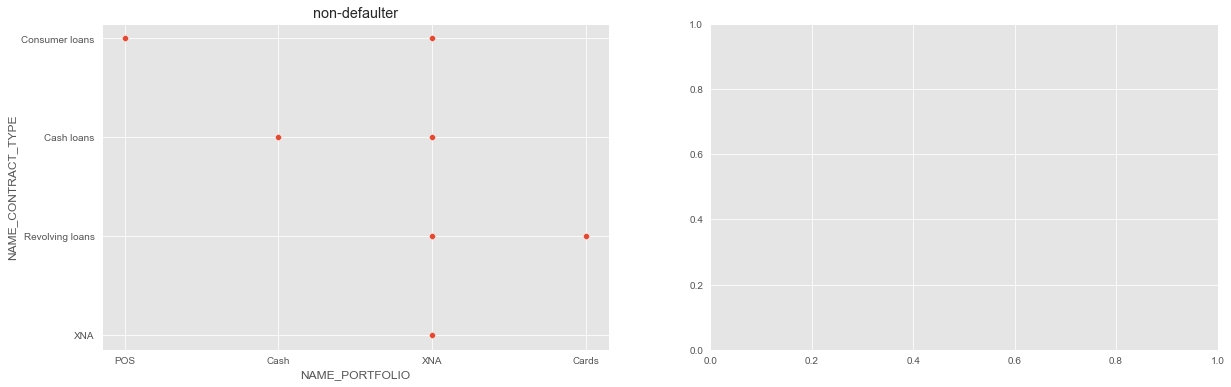

In [219]:


    plt.style.use('ggplot')
    sns.despine
    fig,(ax1,ax2) = plt.subplots(1,2,figsize=(20,6))
    
    sns.scatterplot(x="NAME_PORTFOLIO", y="NAME_CONTRACT_TYPE",data=prev_data2,ax=ax1)
    ax1.set_xlabel("NAME_PORTFOLIO")    
    ax1.set_ylabel("NAME_CONTRACT_TYPE")
    ax1.set_title("non-defaulter")
    

            
    plt.show()

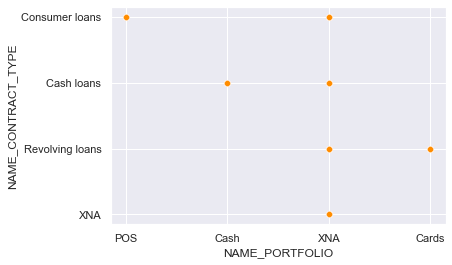

In [286]:
sns.scatterplot(prev_data2["NAME_PORTFOLIO"],prev_data2['NAME_CONTRACT_TYPE'],color='darkorange') ;

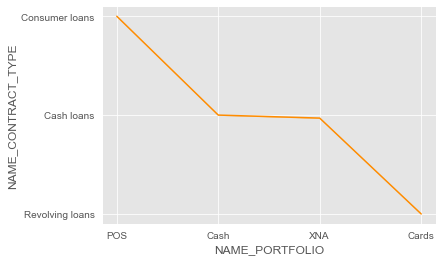

In [229]:
sns.lineplot(prev_data2["NAME_PORTFOLIO"],prev_data2['NAME_CONTRACT_TYPE'],color='darkorange');

- more consumer loans are from pos  and least from cards


# bivariate analysis of NAME_CLIENT_TYPE and CODE_REJECT_REASON

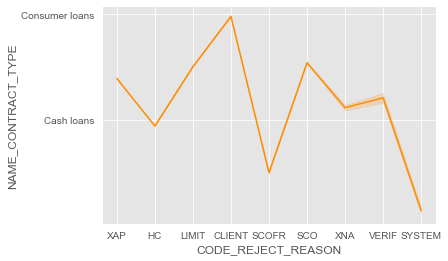

In [232]:
sns.lineplot(prev_data2["CODE_REJECT_REASON"],prev_data2['NAME_CONTRACT_TYPE'],color='darkorange'); 

-The reject reason of client is more for consumer loans

# merging application and previous application data


In [204]:
merge= app_data3.merge(prev_data2, left_on = 'SK_ID_CURR', right_on = 'SK_ID_CURR', how = 'inner')


In [205]:
merge


SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_x CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_x  AMT_ANNUITY_x  AMT_GOODS_PRICE_x NAME_TYPE_SUITE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY WEEKDAY_APPR_PROCESS_START_x  HOUR_APPR_PROCESS_START_x  REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  LIVE_REGION_NOT_WORK_REGION  REG_CITY_NOT_LIVE_CITY  REG_CITY_NOT_WORK_CITY  LIVE_CITY_NOT_WORK_CITY       ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  DAYS_LAST_PHONE_CHANGE  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
0           100002       1           Cash loans           M            N               Y             0         202500.00     406597.50       24700.50          351000.00   Unaccompanied               Working  Secondary / secondary special  Single / not married  House / apartment                        0.02       -9461           -637           -3648.00            -2120           1               1                0                 1           1           0        Laborers             1.00                     2                            2                    WEDNESDAY                         10                           0                           0                            0                       0                       0                        0  Business Entity Type 3          0.26          0.14                      2.00                      2.00                      2.00                      2.00                -1134.00                0                1                0   
1           100003       0           Cash loans           F            N               N             0         270000.00    1293502.50       35698.50         1129500.00          Family         State servant               Higher education               Married  House / apartment                        0.00      -16765          -1188           -1186.00             -291           1               1                0                 1           1           0      Core staff             2.00                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School          0.62           NaN                      1.00                      0.00                      1.00                      0.00                 -828.00                0                1                0   
2           100003       0           Cash loans           F            N               N             0         270000.00    1293502.50       35698.50         1129500.00          Family         State servant               Higher education               Married  House / apartment                        0.00      -16765          -1188           -1186.00             -291           1               1                0                 1           1           0      Core staff             2.00                     1                            1                       MONDAY                         11                           0                           0                            0                       0                       0                        0                  School          0.62           NaN                      1.00                      0.00                      1.00                      0.00                 -828.00                0                1                0   
3           100004       0      Revolving loans     

In [206]:
merge.SK_ID_PREV.value_counts()

1038818    1
2834030    1
2130087    1
2503889    1
1688045    1
          ..
1855140    1
1651247    1
1863297    1
1313214    1
2729207    1
Name: SK_ID_PREV, Length: 826880, dtype: int64

In [207]:
#diving based on target values
merge_0 = merge.loc[merge['TARGET'] == 0]
merge_1 = merge.loc[merge['TARGET'] == 1]


# NAME_CONTRACT_TYPE_x and NAME_EDUCATION_TYPE

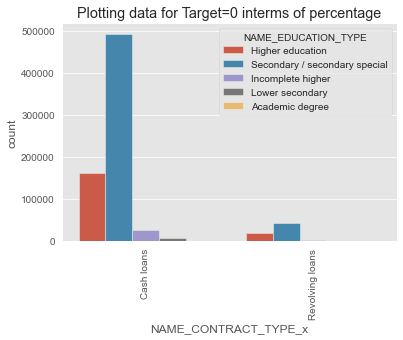

In [244]:
sns.countplot(x="NAME_CONTRACT_TYPE_x", hue = "NAME_EDUCATION_TYPE", data =merge_0)
plt.xticks(rotation=90)
plt.title('Plotting data for Target=0 interms of percentage');



- secondary education people are more in cash loans for target 0

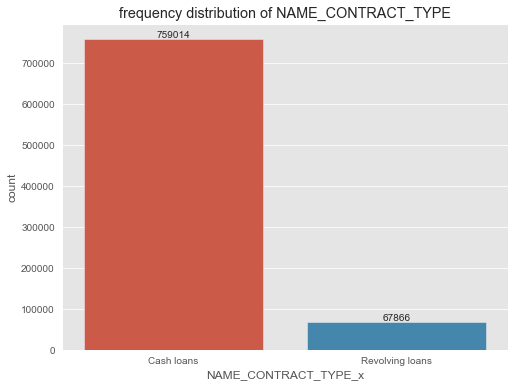

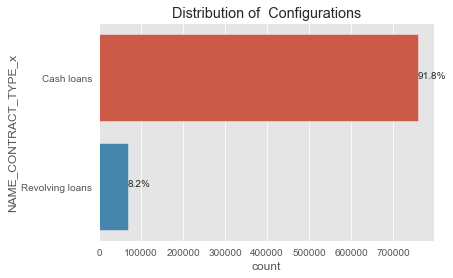

In [255]:
fig = plt.figure(figsize=(8,6))
ax=sns.countplot(merge["NAME_CONTRACT_TYPE_x"])
plt.title("frequency distribution of NAME_CONTRACT_TYPE")
plt.xticks(rotation=0)
for i in ax.containers:
    ax.bar_label(i,)
plt.show()

ax = sns.countplot(y="NAME_CONTRACT_TYPE_x", data=merge)
plt.title('Distribution of  Configurations')
plt.xlabel('count')

total = len(merge['NAME_CONTRACT_TYPE_x'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

- cash loans are more with 91.8%

# FLAG_OWN_CAR and NAME_CONTRACT_STATUS

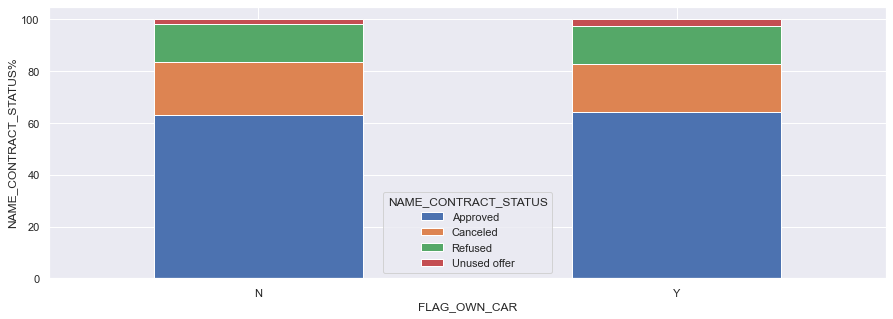

In [274]:
k = merge.pivot_table(values='SK_ID_CURR', 
                      index="FLAG_OWN_CAR",
                      columns="NAME_CONTRACT_STATUS",
                      aggfunc='count')
k=k.div(k.sum(axis=1),axis='rows')*100
sns.set()
k.plot(kind='bar',stacked=True,figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel(f'{"FLAG_OWN_CAR"}')
plt.ylabel(f'{"NAME_CONTRACT_STATUS"}%');


# TARGET and  NAME_CONTRACT_STATUS

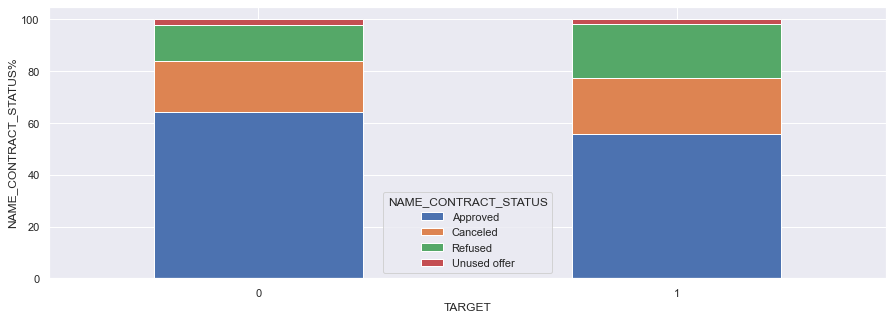

In [275]:
g = merge.pivot_table(values='SK_ID_CURR', 
                      index="TARGET",
                      columns="NAME_CONTRACT_STATUS",
                      aggfunc='count')
g=g.div(g.sum(axis=1),axis='rows')*100
sns.set()
g.plot(kind='bar',stacked=True,figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel(f'{"TARGET"}')
plt.ylabel(f'{"NAME_CONTRACT_STATUS"}%');


- non Defaulters for Approved contract status  are more compared to others

# TARGET and NAME_FAMILY_STATUS 

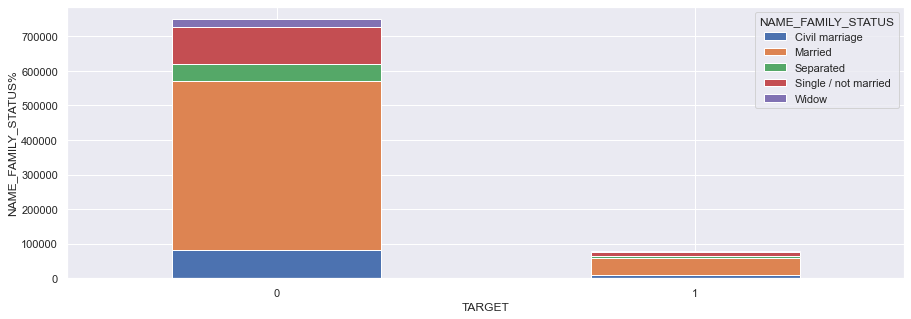

In [276]:
l = merge.pivot_table(values='SK_ID_CURR', 
                      index="TARGET",
                      columns="NAME_FAMILY_STATUS",
                      aggfunc='count')
l=l.div(g.sum(axis=1),axis='rows')*100
sns.set()
l.plot(kind='bar',stacked=True,figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel(f'{"TARGET"}')
plt.ylabel(f'{"NAME_FAMILY_STATUS"}%');


- only married people are more defaulters compared to others

# TARGET and NAME_CONTRACT_TYPE_x

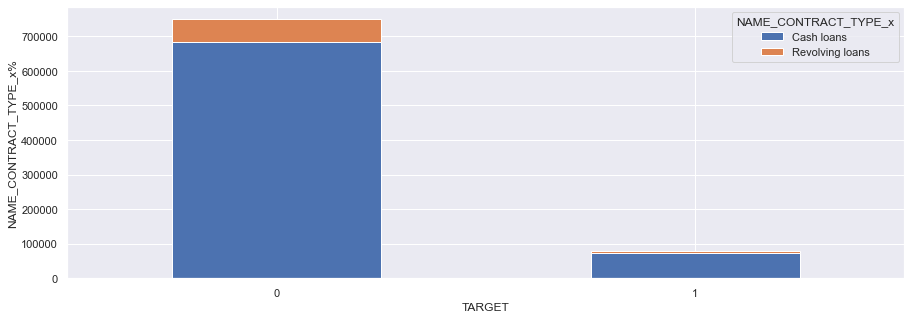

In [278]:
j = merge.pivot_table(values='SK_ID_CURR', 
                      index="TARGET",
                      columns="NAME_CONTRACT_TYPE_x",
                      aggfunc='count')
j=j.div(g.sum(axis=1),axis='rows')*100
sns.set()
j.plot(kind='bar',stacked=True,figsize=(15,5))
plt.xticks(rotation=0)
plt.xlabel(f'{"TARGET"}')
plt.ylabel(f'{"NAME_CONTRACT_TYPE_x"}%');


# conclusions

- The persons who are having house(68.0%) are more than persons who are not having cars(32.0%)
- The person who having the house are more non defaulter compared to person who doesn't has house
- The laborers are more with 26.1% followed by sales staff with 15.2% followed by core staff with 13.0%
- The core staff , managers,high skilled tech staff,accountants,medicine staff,private service staff, non defaulters are more compared to others
- The apartments are more compared to other housing types with 87.4%
- The persons who has apartments are more non defaulters compared to other
- The persons who are studied secondary are more with 69.6% followed by higher education with 25.7%
- The persons who have completed Higher education are having more non defaulters compared to others
- The medium income people are more with 27.9% folllowed by high income with 26.2%
- The high income and very high income clients are having more non defaulters
- The people who are requiring medium credit loan are more with 36.5%
- The people who are requiring high credit and very high credit are more non defaulter when compared to others
- The are more clients with 33-42 years age group with 29.6% followed by 49-68 age group with 20.1%
- The people who are in age group 42-49 and 49-68 are having more non defaulters
- The families with 2 people are more with 49.7% followed by 3 with 20.9%
- The people who are having only 2 family members are having more non defaulters compared to oth
- The families with 2 people taking more credits


    

- The repeater are more with 71.6% followed by new with 20% 
- The Approved are more with 62.7% followed by canceled 21.1%
- The clients whos loan was rejected due to xap are more with 83.8% followed by HC with 7.9%
- The previous application is pos with 46.6.% followed by XNA with 25.4%
- The consumer loans are more with 49.1% followed by cash laons 38.5%
- There are more consumer loans are from pos and least from cards
- The reject reason of client is more for consumer loans

- secondary education people are more in cash loans for target 0
- The cash loans are more with 91.8%
- The non Defaulters for Approved contract status are more compared to others
- only married people are more defaulters compared to others

# suggestions

- The bank should focus more on people who are having own house as they as more in non-defaulter
- The bank should focus more on people in Core staff , managers,high skilled tech staff,accountants,medicine staff,private service staf 
- The bank should focus more on people who are in  apartments because they are  more non defaulters compared to other
- The bank should focus more on people who completed Higher education
- The bank should focus on people who are earning  high income and very high income clients(>180000) because they are more non defaulters
- The bank should focus more on people who are having age between 42-68
- The bank should focus more on people who are having family members only 2